In [1]:
%matplotlib inline

In [2]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

In [3]:
# Filter the counts_by_year data for non-perishable ratios percent (total non-perishable losses/total production) 
perishable_data = pd.read_csv("counts_by_year.csv", index_col=0, usecols = ["Area", "P_ratio_percent_1961", "P_ratio_percent_1962", "P_ratio_percent_1963","P_ratio_percent_1964","P_ratio_percent_1965","P_ratio_percent_1966","P_ratio_percent_1967","P_ratio_percent_1968","P_ratio_percent_1969","P_ratio_percent_1970","P_ratio_percent_1971","P_ratio_percent_1972","P_ratio_percent_1973","P_ratio_percent_1974","P_ratio_percent_1975","P_ratio_percent_1976","P_ratio_percent_1977","P_ratio_percent_1978","P_ratio_percent_1979","P_ratio_percent_1980","P_ratio_percent_1981","P_ratio_percent_1982","P_ratio_percent_1983","P_ratio_percent_1984","P_ratio_percent_1985","P_ratio_percent_1986","P_ratio_percent_1987", "P_ratio_percent_1988","P_ratio_percent_1989","P_ratio_percent_1990","P_ratio_percent_1991","P_ratio_percent_1992","P_ratio_percent_1993","P_ratio_percent_1994","P_ratio_percent_1995","P_ratio_percent_1996","P_ratio_percent_1997","P_ratio_percent_1998","P_ratio_percent_1999","P_ratio_percent_2000","P_ratio_percent_2001","P_ratio_percent_2002","P_ratio_percent_2003","P_ratio_percent_2004","P_ratio_percent_2005","P_ratio_percent_2006","P_ratio_percent_2007","P_ratio_percent_2008","P_ratio_percent_2009","P_ratio_percent_2010","P_ratio_percent_2011","P_ratio_percent_2012","P_ratio_percent_2013", "P_ratio_percent_2014", "P_ratio_percent_2015", "P_ratio_percent_2016", "P_ratio_percent_2017", "P_ratio_percent_2018"]) 
nonperishable_data = pd.read_csv("counts_by_year.csv", index_col=0, usecols = ["Area", "NP_ratio_percent_1961", "NP_ratio_percent_1962", "NP_ratio_percent_1963","NP_ratio_percent_1964","NP_ratio_percent_1965","NP_ratio_percent_1966","NP_ratio_percent_1967","NP_ratio_percent_1968","NP_ratio_percent_1969","NP_ratio_percent_1970","NP_ratio_percent_1971","NP_ratio_percent_1972","NP_ratio_percent_1973","NP_ratio_percent_1974","NP_ratio_percent_1975","NP_ratio_percent_1976","NP_ratio_percent_1977","NP_ratio_percent_1978","NP_ratio_percent_1979","NP_ratio_percent_1980","NP_ratio_percent_1981","NP_ratio_percent_1982","NP_ratio_percent_1983","NP_ratio_percent_1984","NP_ratio_percent_1985","NP_ratio_percent_1986","NP_ratio_percent_1987", "NP_ratio_percent_1988","NP_ratio_percent_1989","NP_ratio_percent_1990","NP_ratio_percent_1991","NP_ratio_percent_1992","NP_ratio_percent_1993","NP_ratio_percent_1994","NP_ratio_percent_1995","NP_ratio_percent_1996","NP_ratio_percent_1997","NP_ratio_percent_1998","NP_ratio_percent_1999","NP_ratio_percent_2000","NP_ratio_percent_2001","NP_ratio_percent_2002","NP_ratio_percent_2003","NP_ratio_percent_2004","NP_ratio_percent_2005","NP_ratio_percent_2006","NP_ratio_percent_2007","NP_ratio_percent_2008","NP_ratio_percent_2009","NP_ratio_percent_2010","NP_ratio_percent_2011","NP_ratio_percent_2012","NP_ratio_percent_2013", "NP_ratio_percent_2014", "NP_ratio_percent_2015", "NP_ratio_percent_2016", "NP_ratio_percent_2017", "NP_ratio_percent_2018"]) 
totalfoodloss_data = pd.read_csv("counts_by_year.csv", index_col=0, usecols = ["Area", "Total_ratio_percent_1961", "Total_ratio_percent_1962", "Total_ratio_percent_1963","Total_ratio_percent_1964","Total_ratio_percent_1965","Total_ratio_percent_1966","Total_ratio_percent_1967","Total_ratio_percent_1968","Total_ratio_percent_1969","Total_ratio_percent_1970","Total_ratio_percent_1971","Total_ratio_percent_1972","Total_ratio_percent_1973","Total_ratio_percent_1974","Total_ratio_percent_1975","Total_ratio_percent_1976","Total_ratio_percent_1977","Total_ratio_percent_1978","Total_ratio_percent_1979","Total_ratio_percent_1980","Total_ratio_percent_1981","Total_ratio_percent_1982","Total_ratio_percent_1983","Total_ratio_percent_1984","Total_ratio_percent_1985","Total_ratio_percent_1986","Total_ratio_percent_1987", "Total_ratio_percent_1988","Total_ratio_percent_1989","Total_ratio_percent_1990","Total_ratio_percent_1991","Total_ratio_percent_1992","Total_ratio_percent_1993","Total_ratio_percent_1994","Total_ratio_percent_1995","Total_ratio_percent_1996","Total_ratio_percent_1997","Total_ratio_percent_1998","Total_ratio_percent_1999","Total_ratio_percent_2000","Total_ratio_percent_2001","Total_ratio_percent_2002","Total_ratio_percent_2003","Total_ratio_percent_2004","Total_ratio_percent_2005","Total_ratio_percent_2006","Total_ratio_percent_2007","Total_ratio_percent_2008","Total_ratio_percent_2009","Total_ratio_percent_2010","Total_ratio_percent_2011","Total_ratio_percent_2012","Total_ratio_percent_2013", "Total_ratio_percent_2014", "Total_ratio_percent_2015", "Total_ratio_percent_2016", "Total_ratio_percent_2017", "Total_ratio_percent_2018"]) 

labels = (pd.read_csv("country_name.csv"))

In [4]:
perishable_data

,P_ratio_percent_1961,P_ratio_percent_1962,P_ratio_percent_1963,P_ratio_percent_1964,P_ratio_percent_1965,P_ratio_percent_1966,P_ratio_percent_1967,P_ratio_percent_1968,P_ratio_percent_1969,P_ratio_percent_1970,...,P_ratio_percent_2009,P_ratio_percent_2010,P_ratio_percent_2011,P_ratio_percent_2012,P_ratio_percent_2013,P_ratio_percent_2014,P_ratio_percent_2015,P_ratio_percent_2016,P_ratio_percent_2017,P_ratio_percent_2018
Area,,,,,,,,,,,,,,,,,,,,,
"China, mainland",5.591681,5.616770,5.378525,5.112016,5.091894,5.108057,5.087222,5.193169,5.202126,5.018055,...,6.417534,6.493712,6.729509,5.940742,5.942382,7.374800,7.410184,7.441364,7.391814,7.079342
Mexico,3.212264,3.270766,3.353204,3.178334,3.225885,3.313466,3.282030,3.249412,3.277059,3.281539,...,4.497859,4.449609,4.502384,4.463920,4.310047,4.612875,4.688151,4.498447,4.517032,4.600660
United States of America,3.650678,3.642894,3.415113,3.134421,3.718903,3.914903,3.541907,3.258710,3.258371,3.107570,...,2.769576,2.663797,2.753067,2.928309,3.014914,4.288774,4.233579,4.167027,4.104668,4.103645
Brazil,9.826632,13.032241,9.797330,9.514293,11.951774,9.902101,14.166350,11.440854,11.531772,10.993688,...,6.705818,7.179447,16.387352,7.478169,7.410688,10.235970,10.181079,10.202759,10.090819,10.075024
Japan,6.131499,6.170979,6.583102,6.450441,6.746050,7.228543,7.395298,7.792597,7.942643,8.088508,...,7.958803,8.252034,8.246687,8.050089,8.071402,8.362999,8.116140,8.286926,8.046248,8.114474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Djibouti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.756098,9.677419,11.363636,9.677419,9.890110,7.692308,7.608696,8.421053,7.619048,9.000000
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508
Kiribati,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508


In [5]:
#drop NAs and Infinite values (just in case). 

perishable_data = perishable_data[~perishable_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [6]:
#Looks like there aren't any
perishable_data

,P_ratio_percent_1961,P_ratio_percent_1962,P_ratio_percent_1963,P_ratio_percent_1964,P_ratio_percent_1965,P_ratio_percent_1966,P_ratio_percent_1967,P_ratio_percent_1968,P_ratio_percent_1969,P_ratio_percent_1970,...,P_ratio_percent_2009,P_ratio_percent_2010,P_ratio_percent_2011,P_ratio_percent_2012,P_ratio_percent_2013,P_ratio_percent_2014,P_ratio_percent_2015,P_ratio_percent_2016,P_ratio_percent_2017,P_ratio_percent_2018
Area,,,,,,,,,,,,,,,,,,,,,
"China, mainland",5.591681,5.616770,5.378525,5.112016,5.091894,5.108057,5.087222,5.193169,5.202126,5.018055,...,6.417534,6.493712,6.729509,5.940742,5.942382,7.374800,7.410184,7.441364,7.391814,7.079342
Mexico,3.212264,3.270766,3.353204,3.178334,3.225885,3.313466,3.282030,3.249412,3.277059,3.281539,...,4.497859,4.449609,4.502384,4.463920,4.310047,4.612875,4.688151,4.498447,4.517032,4.600660
United States of America,3.650678,3.642894,3.415113,3.134421,3.718903,3.914903,3.541907,3.258710,3.258371,3.107570,...,2.769576,2.663797,2.753067,2.928309,3.014914,4.288774,4.233579,4.167027,4.104668,4.103645
Brazil,9.826632,13.032241,9.797330,9.514293,11.951774,9.902101,14.166350,11.440854,11.531772,10.993688,...,6.705818,7.179447,16.387352,7.478169,7.410688,10.235970,10.181079,10.202759,10.090819,10.075024
Japan,6.131499,6.170979,6.583102,6.450441,6.746050,7.228543,7.395298,7.792597,7.942643,8.088508,...,7.958803,8.252034,8.246687,8.050089,8.071402,8.362999,8.116140,8.286926,8.046248,8.114474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Djibouti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.756098,9.677419,11.363636,9.677419,9.890110,7.692308,7.608696,8.421053,7.619048,9.000000
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508
Kiribati,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508


In [7]:
from sklearn.model_selection import train_test_split

# find all clusters using the entire dataset
train = perishable_data

train

,P_ratio_percent_1961,P_ratio_percent_1962,P_ratio_percent_1963,P_ratio_percent_1964,P_ratio_percent_1965,P_ratio_percent_1966,P_ratio_percent_1967,P_ratio_percent_1968,P_ratio_percent_1969,P_ratio_percent_1970,...,P_ratio_percent_2009,P_ratio_percent_2010,P_ratio_percent_2011,P_ratio_percent_2012,P_ratio_percent_2013,P_ratio_percent_2014,P_ratio_percent_2015,P_ratio_percent_2016,P_ratio_percent_2017,P_ratio_percent_2018
Area,,,,,,,,,,,,,,,,,,,,,
"China, mainland",5.591681,5.616770,5.378525,5.112016,5.091894,5.108057,5.087222,5.193169,5.202126,5.018055,...,6.417534,6.493712,6.729509,5.940742,5.942382,7.374800,7.410184,7.441364,7.391814,7.079342
Mexico,3.212264,3.270766,3.353204,3.178334,3.225885,3.313466,3.282030,3.249412,3.277059,3.281539,...,4.497859,4.449609,4.502384,4.463920,4.310047,4.612875,4.688151,4.498447,4.517032,4.600660
United States of America,3.650678,3.642894,3.415113,3.134421,3.718903,3.914903,3.541907,3.258710,3.258371,3.107570,...,2.769576,2.663797,2.753067,2.928309,3.014914,4.288774,4.233579,4.167027,4.104668,4.103645
Brazil,9.826632,13.032241,9.797330,9.514293,11.951774,9.902101,14.166350,11.440854,11.531772,10.993688,...,6.705818,7.179447,16.387352,7.478169,7.410688,10.235970,10.181079,10.202759,10.090819,10.075024
Japan,6.131499,6.170979,6.583102,6.450441,6.746050,7.228543,7.395298,7.792597,7.942643,8.088508,...,7.958803,8.252034,8.246687,8.050089,8.071402,8.362999,8.116140,8.286926,8.046248,8.114474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Djibouti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.756098,9.677419,11.363636,9.677419,9.890110,7.692308,7.608696,8.421053,7.619048,9.000000
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508
Kiribati,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508


C:\Users\madhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


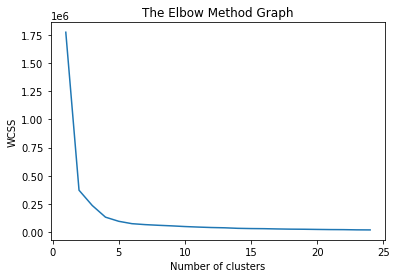

In [8]:
from sklearn.cluster import KMeans
wcss=[]
# find the ideal number of clusters
for i in range(1,25): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train)

    wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
plt.plot(range(1,25),wcss)

# Elbow Graph
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Looks like the ideal number of clusters here is 3

In [9]:
# using 3 clusters for cluster analysis
# Scaler for time series. 
# Scales time series so that their mean (resp. standard deviation) in each dimension is mu (resp. std).
train = TimeSeriesScalerMeanVariance().fit_transform(train)
# Make time series shorter
train = TimeSeriesResampler(sz=40).fit_transform(train)
sz = train.shape[1]

seed = 0
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(train)

Euclidean k-means
24.492 --> 17.552 --> 17.450 --> 17.408 --> 17.402 --> 17.402 --> 


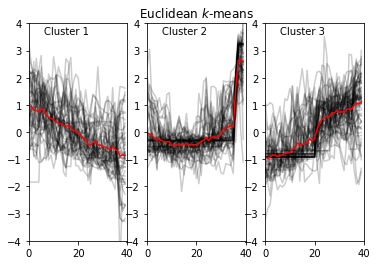

In [10]:
plt.figure()
for yi in range(3):
    plt.subplot(1, 3, yi + 1)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.15, 0.95,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

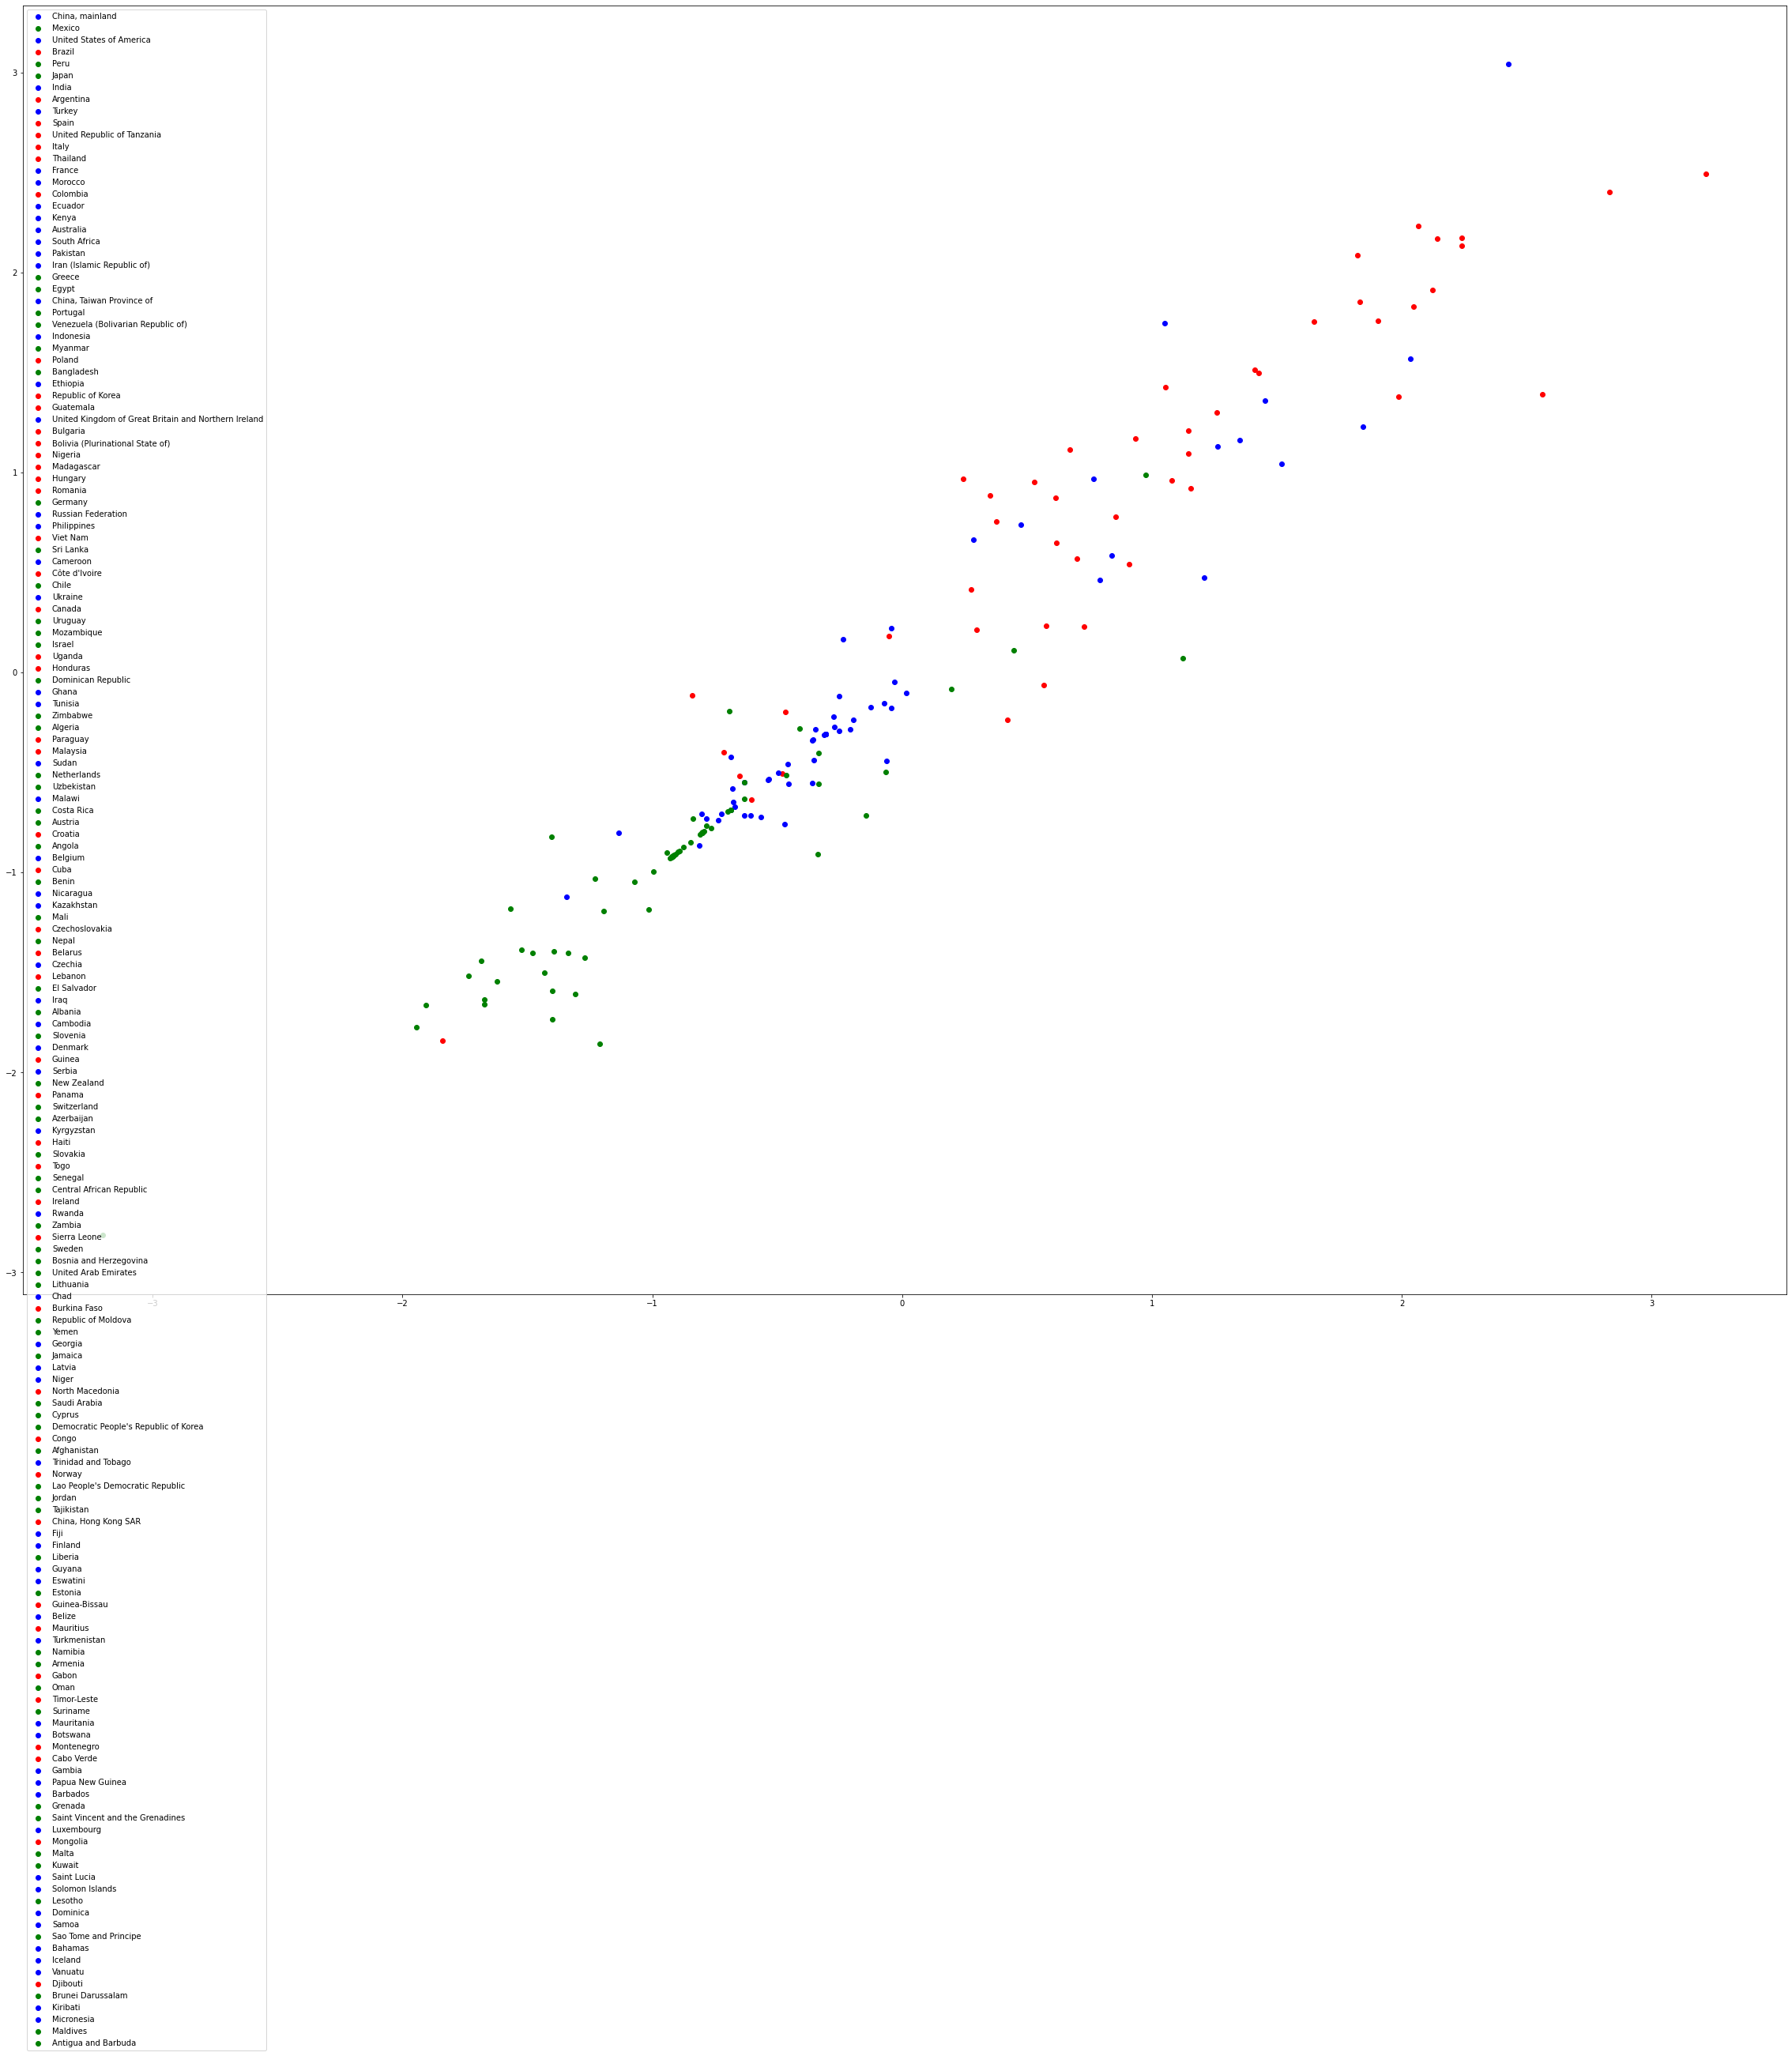

In [11]:
# PLot showing  the clusters for regular K-means
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

In [12]:
len(train)

172

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.2s finished


12.266 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.629 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.538 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.519 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7.519 --> 
Init 2


[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


13.083 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.671 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


7.596 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


7.555 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.512 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.502 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.466 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.464 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.464 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


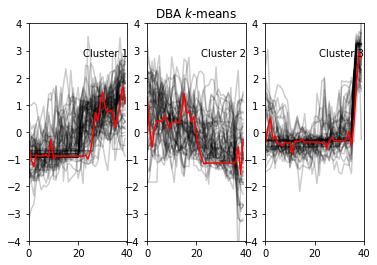

In [13]:
# Performing TimeSeriesKmeans using DBA-k-means (for DTW Barycenter Averaging [1]) 
# [1] F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method for dynamic time warping, with applications to clustering. 
# Pattern Recognition, Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693 
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(train)

for yi in range(3):
    plt.subplot(1, 3, 1 + yi)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

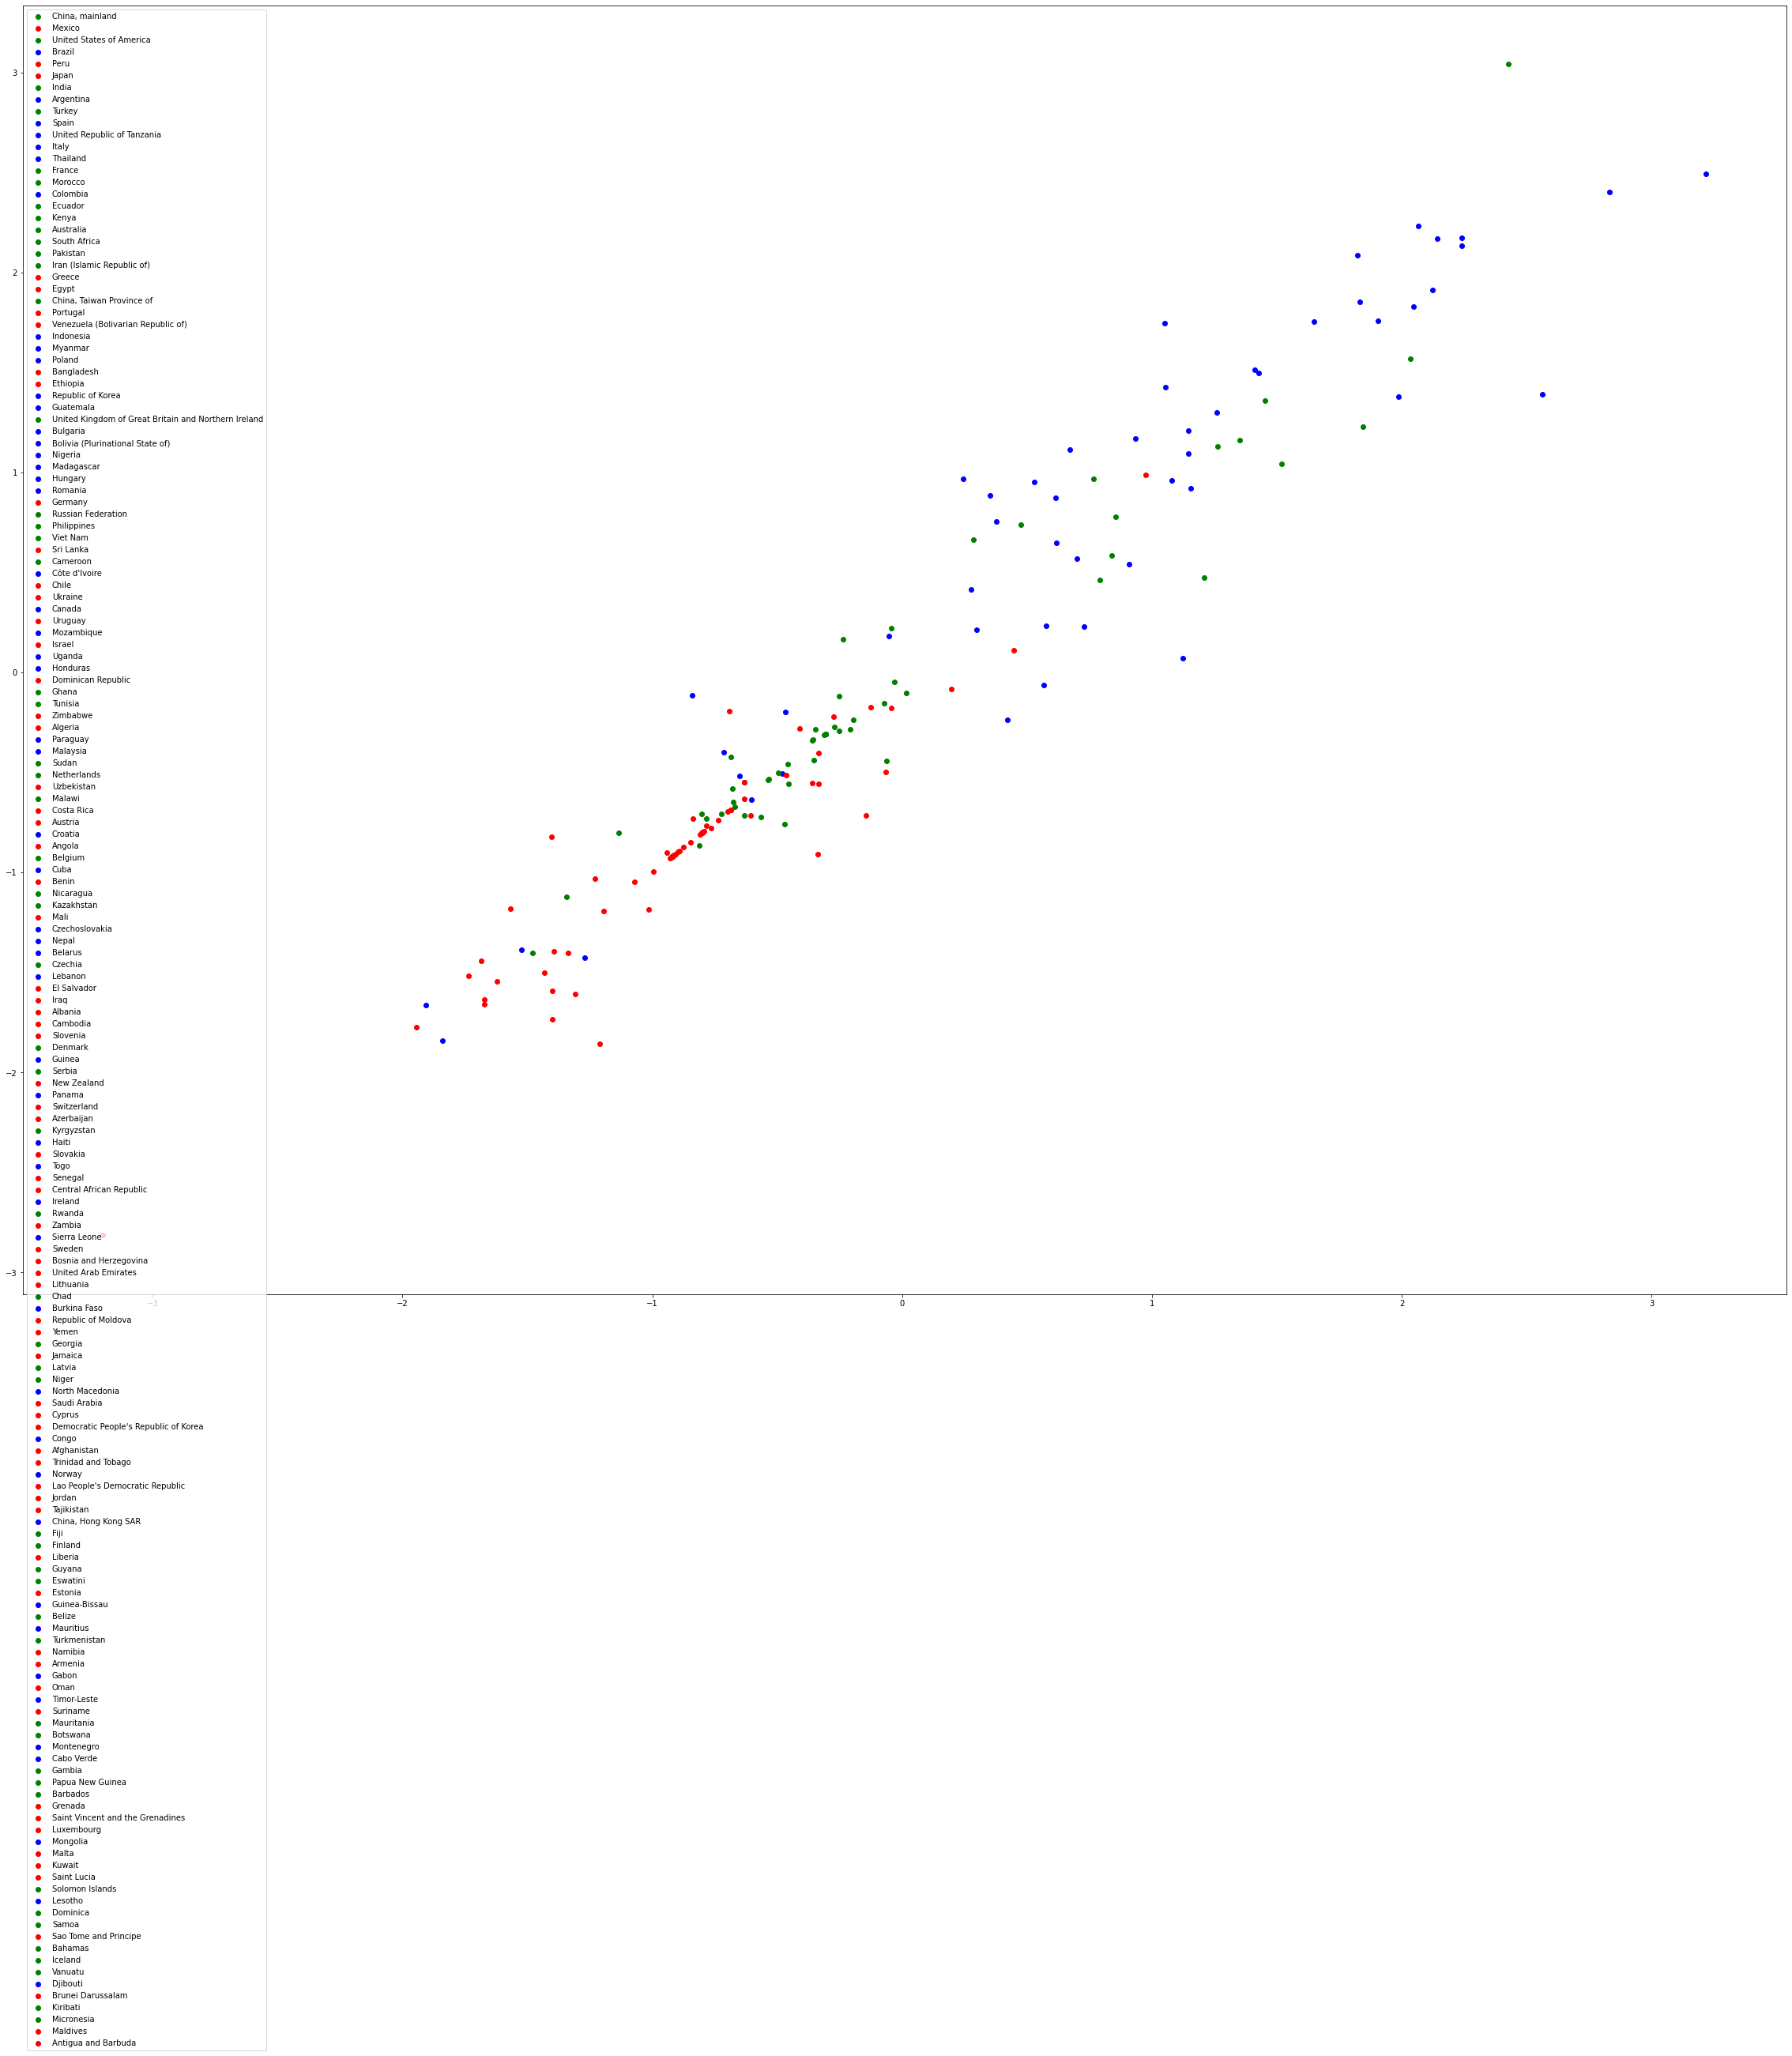

In [14]:
# Plot showing clusters for DTW Barycenter Averaging (DBA K-means)
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

Soft-DTW k-means
276.816 --> 90.003 --> 88.677 --> 88.810 --> 88.574 --> 88.613 --> 88.523 --> 88.544 --> 88.469 --> 88.522 --> 88.447 --> 88.507 --> 88.456 --> 88.502 --> 88.475 --> 88.493 --> 88.482 --> 88.489 --> 88.476 --> 88.488 --> 88.483 --> 88.487 --> 88.481 --> 88.485 --> 88.484 --> 88.484 --> 88.483 --> 88.484 --> 88.483 --> 88.483 --> 88.483 --> 88.483 --> 88.482 --> 88.483 --> 88.480 --> 88.482 --> 88.477 --> 88.480 --> 88.476 --> 88.479 --> 88.473 --> 88.477 --> 88.475 --> 88.476 --> 88.475 --> 88.476 --> 88.475 --> 88.475 --> 88.475 --> 88.475 --> 


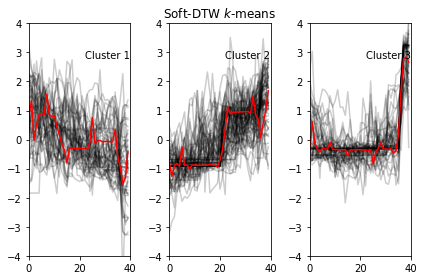

In [15]:
# Soft-DTW-k-means
#  [2] M. Cuturi, M. Blondel “Soft-DTW: a Differentiable Loss Function for Time-Series,” ICML 2017.
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(train)

for yi in range(3):
    plt.subplot(1, 3, 1 + yi)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

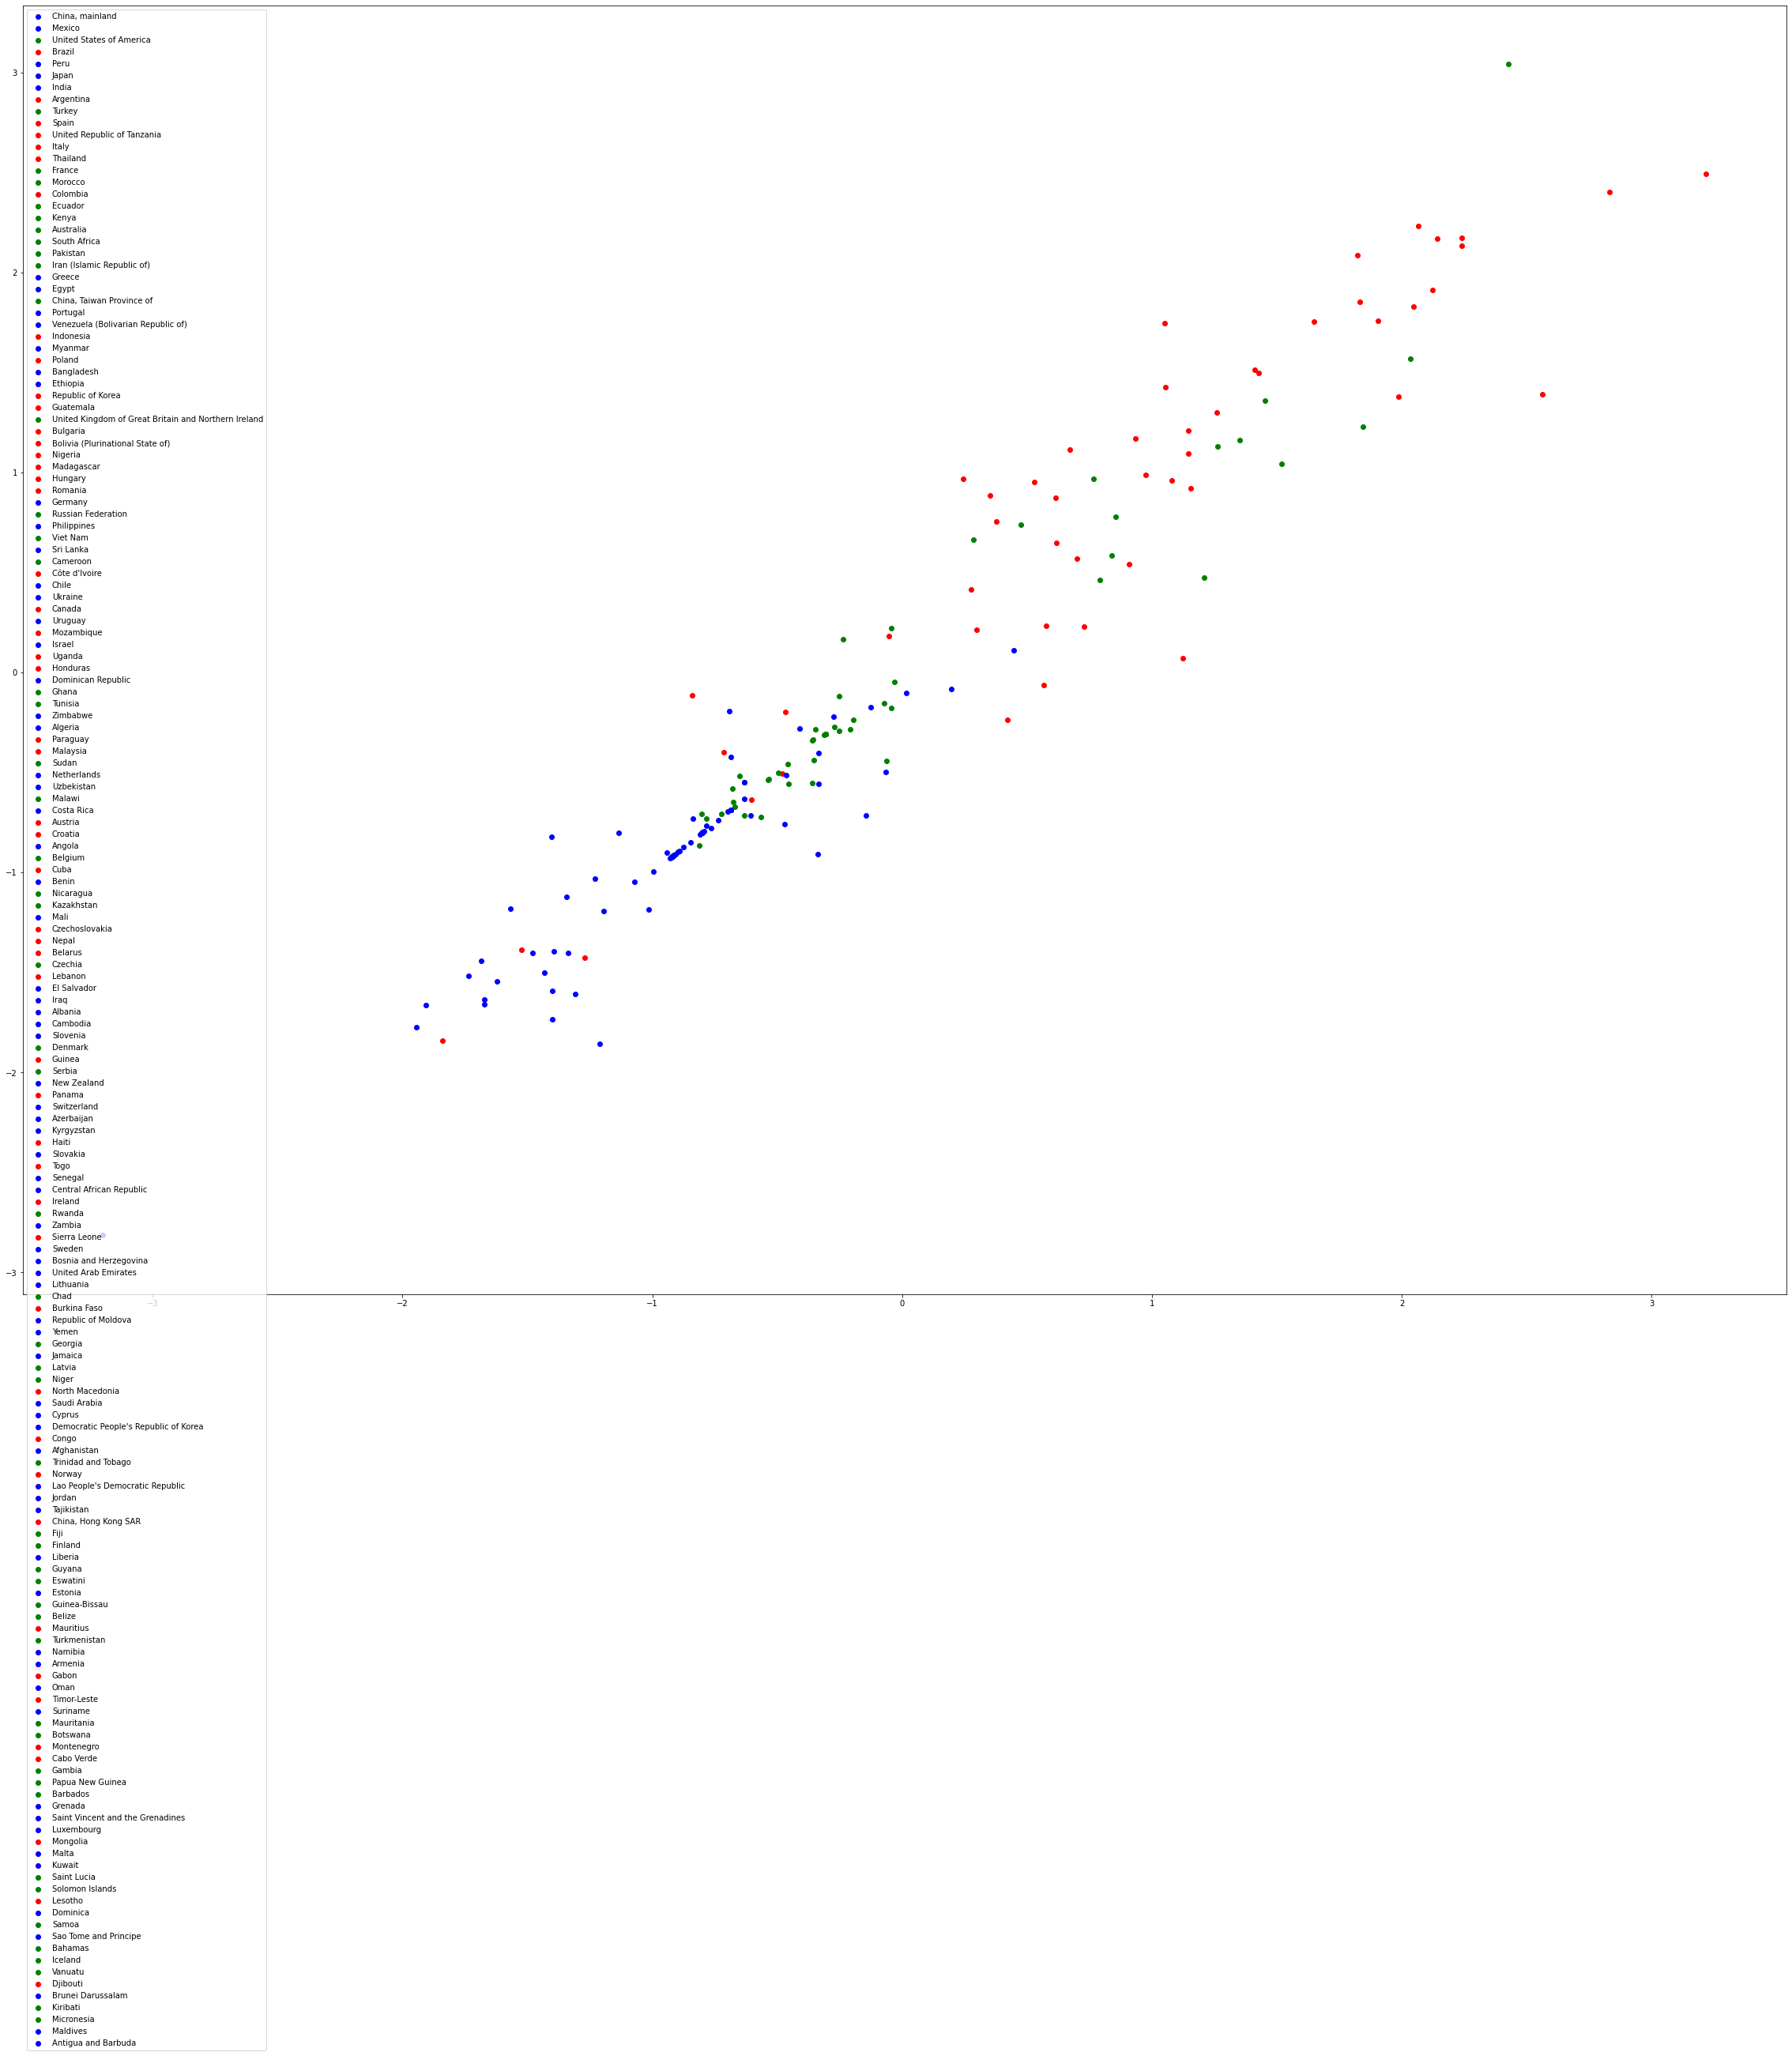

In [16]:
# Plot showing clusters for Soft-DTW K-means
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

In [17]:
labels['Perishable_Clusters'] = y_pred.tolist()

In [18]:
labels

,Area,Perishable_Clusters
0,"China, mainland",1
1,Mexico,1
2,United States of America,2
3,Brazil,0
4,Peru,1
...,...,...
167,Brunei Darussalam,1
168,Kiribati,2
169,Micronesia,2
170,Maldives,1


In [19]:
nonperishable_data = nonperishable_data[~nonperishable_data.isin([np.nan, np.inf, -np.inf]).any(1)]

train = nonperishable_data
train

,NP_ratio_percent_1961,NP_ratio_percent_1962,NP_ratio_percent_1963,NP_ratio_percent_1964,NP_ratio_percent_1965,NP_ratio_percent_1966,NP_ratio_percent_1967,NP_ratio_percent_1968,NP_ratio_percent_1969,NP_ratio_percent_1970,...,NP_ratio_percent_2009,NP_ratio_percent_2010,NP_ratio_percent_2011,NP_ratio_percent_2012,NP_ratio_percent_2013,NP_ratio_percent_2014,NP_ratio_percent_2015,NP_ratio_percent_2016,NP_ratio_percent_2017,NP_ratio_percent_2018
Area,,,,,,,,,,,,,,,,,,,,,
"China, mainland",6.040998,5.859831,5.907934,6.014049,6.110703,6.210337,6.103714,6.111625,6.078873,6.133710,...,3.749583,3.783222,3.858863,3.776506,3.769878,3.547980,3.502098,4.353538,4.320809,3.737840
Mexico,5.781287,5.157715,10.119048,12.917697,5.425710,4.173268,3.256615,5.064087,2.624334,9.457872,...,12.650955,11.886076,10.900962,10.215249,8.795191,10.045662,11.335060,11.539891,11.885109,12.491588
United States of America,0.334744,0.353250,0.304660,0.314419,0.301994,0.375168,0.383441,0.366648,0.416486,0.412278,...,0.382715,0.419007,0.194485,0.275304,0.204481,3.986176,3.912479,3.962200,4.071681,4.048755
Brazil,7.729432,8.107428,8.328089,8.367529,7.908273,8.120557,8.152334,8.399065,8.221364,8.058389,...,6.734386,6.557215,6.748845,7.145139,7.274861,7.346989,7.513641,7.120898,7.648412,7.595397
Japan,2.292394,2.312470,2.469653,2.515375,2.442986,2.527729,2.323916,2.331428,2.456529,2.677918,...,4.431695,4.595023,4.968053,4.339776,4.383065,3.451260,3.461956,3.518737,3.567227,3.648273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Djibouti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kiribati,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\madhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


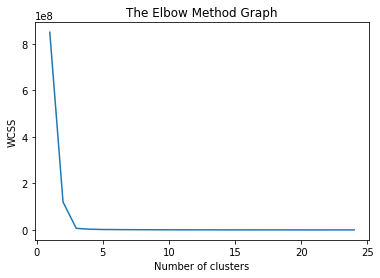

In [20]:
from sklearn.cluster import KMeans
wcss=[]
# find the ideal number of clusters
for i in range(1,25): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train)

    wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
plt.plot(range(1,25),wcss)

# Elbow Graph
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Looks like the ideal number of clusters here is 3

In [21]:
# using 3 clusters for cluster analysis
# Scaler for time series. 
# Scales time series so that their mean (resp. standard deviation) in each dimension is mu (resp. std).
train = TimeSeriesScalerMeanVariance().fit_transform(train)
# Make time series shorter
train = TimeSeriesResampler(sz=40).fit_transform(train)
sz = train.shape[1]

seed = 0
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(train)

Euclidean k-means
30.928 --> 18.180 --> 18.138 --> 18.138 --> 


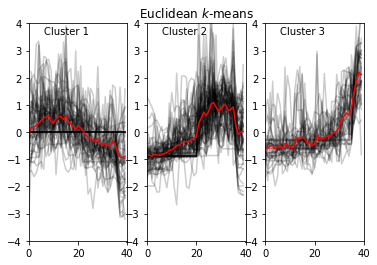

In [22]:
plt.figure()
for yi in range(3):
    plt.subplot(1, 3, yi + 1)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.15, 0.95,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

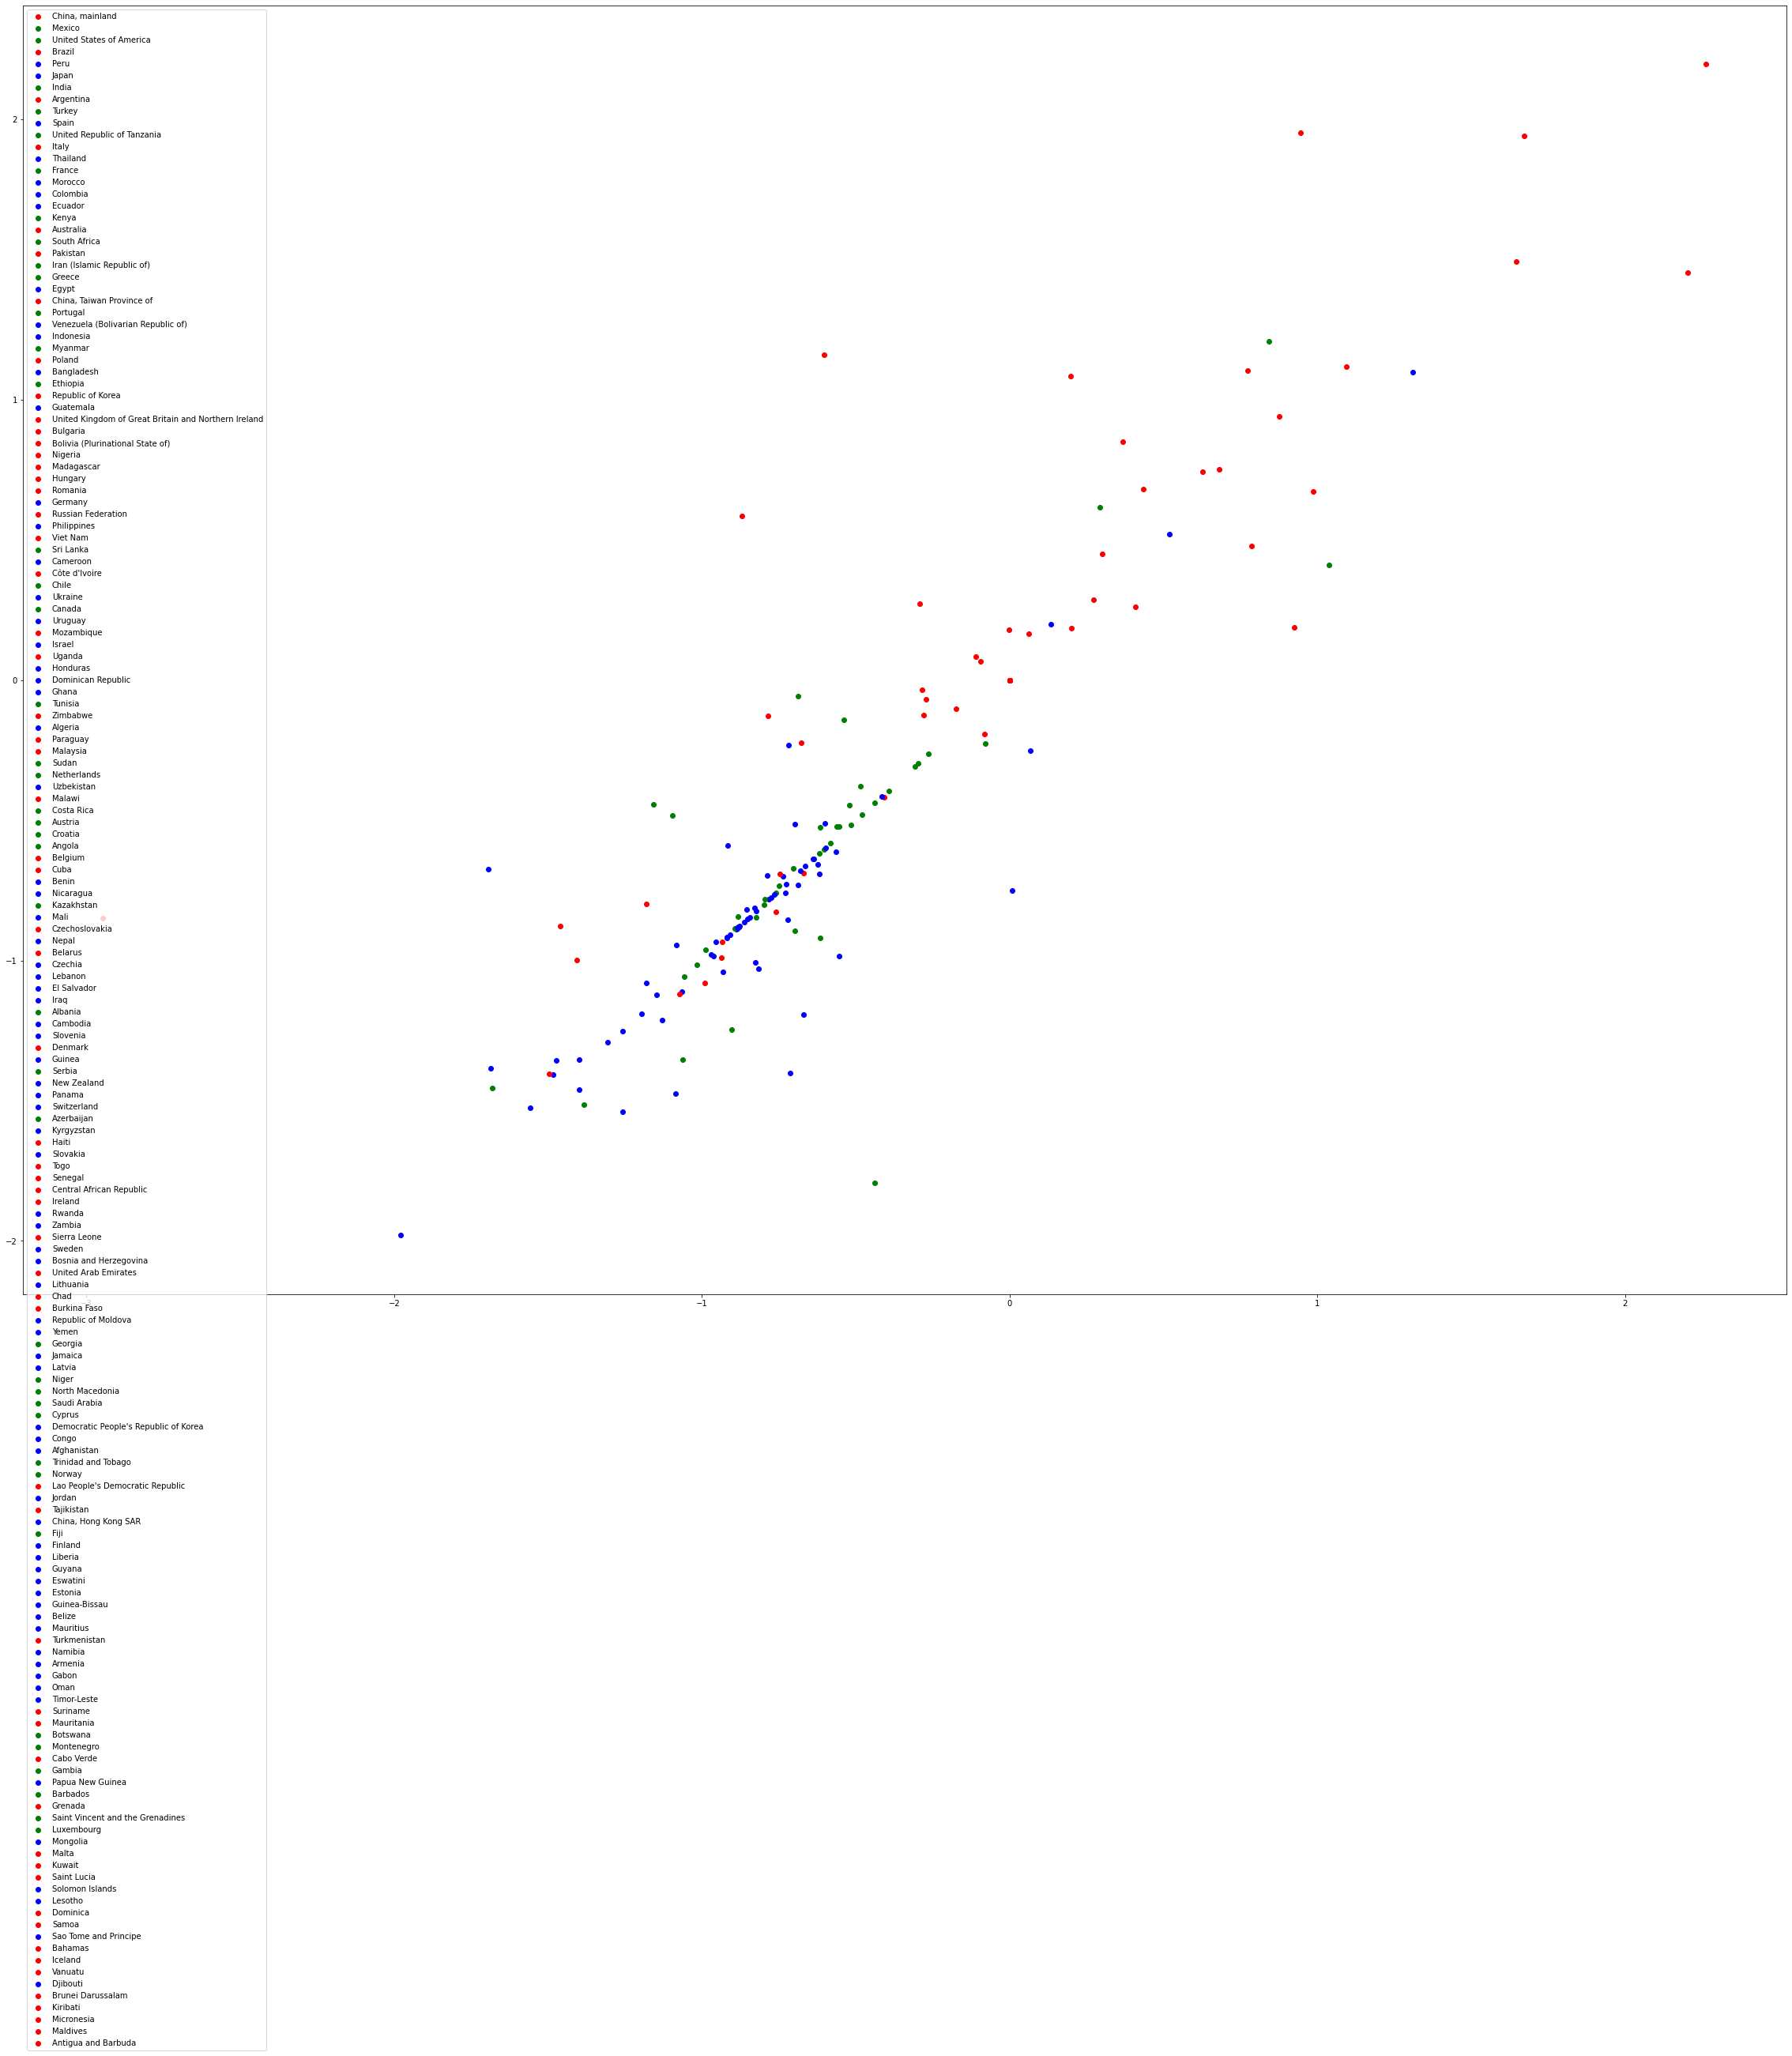

In [23]:
# PLot showing  the clusters for regular K-means
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


14.958 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.677 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.567 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


8.537 --> 8.537 --> 

[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Init 2


[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


13.028 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.693 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.595 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.595 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


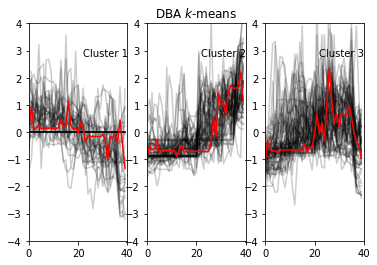

In [24]:
# Performing TimeSeriesKmeans using DBA-k-means (for DTW Barycenter Averaging [1]) 
# [1] F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method for dynamic time warping, with applications to clustering. 
# Pattern Recognition, Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693 
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(train)

for yi in range(3):
    plt.subplot(1, 3, 1 + yi)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

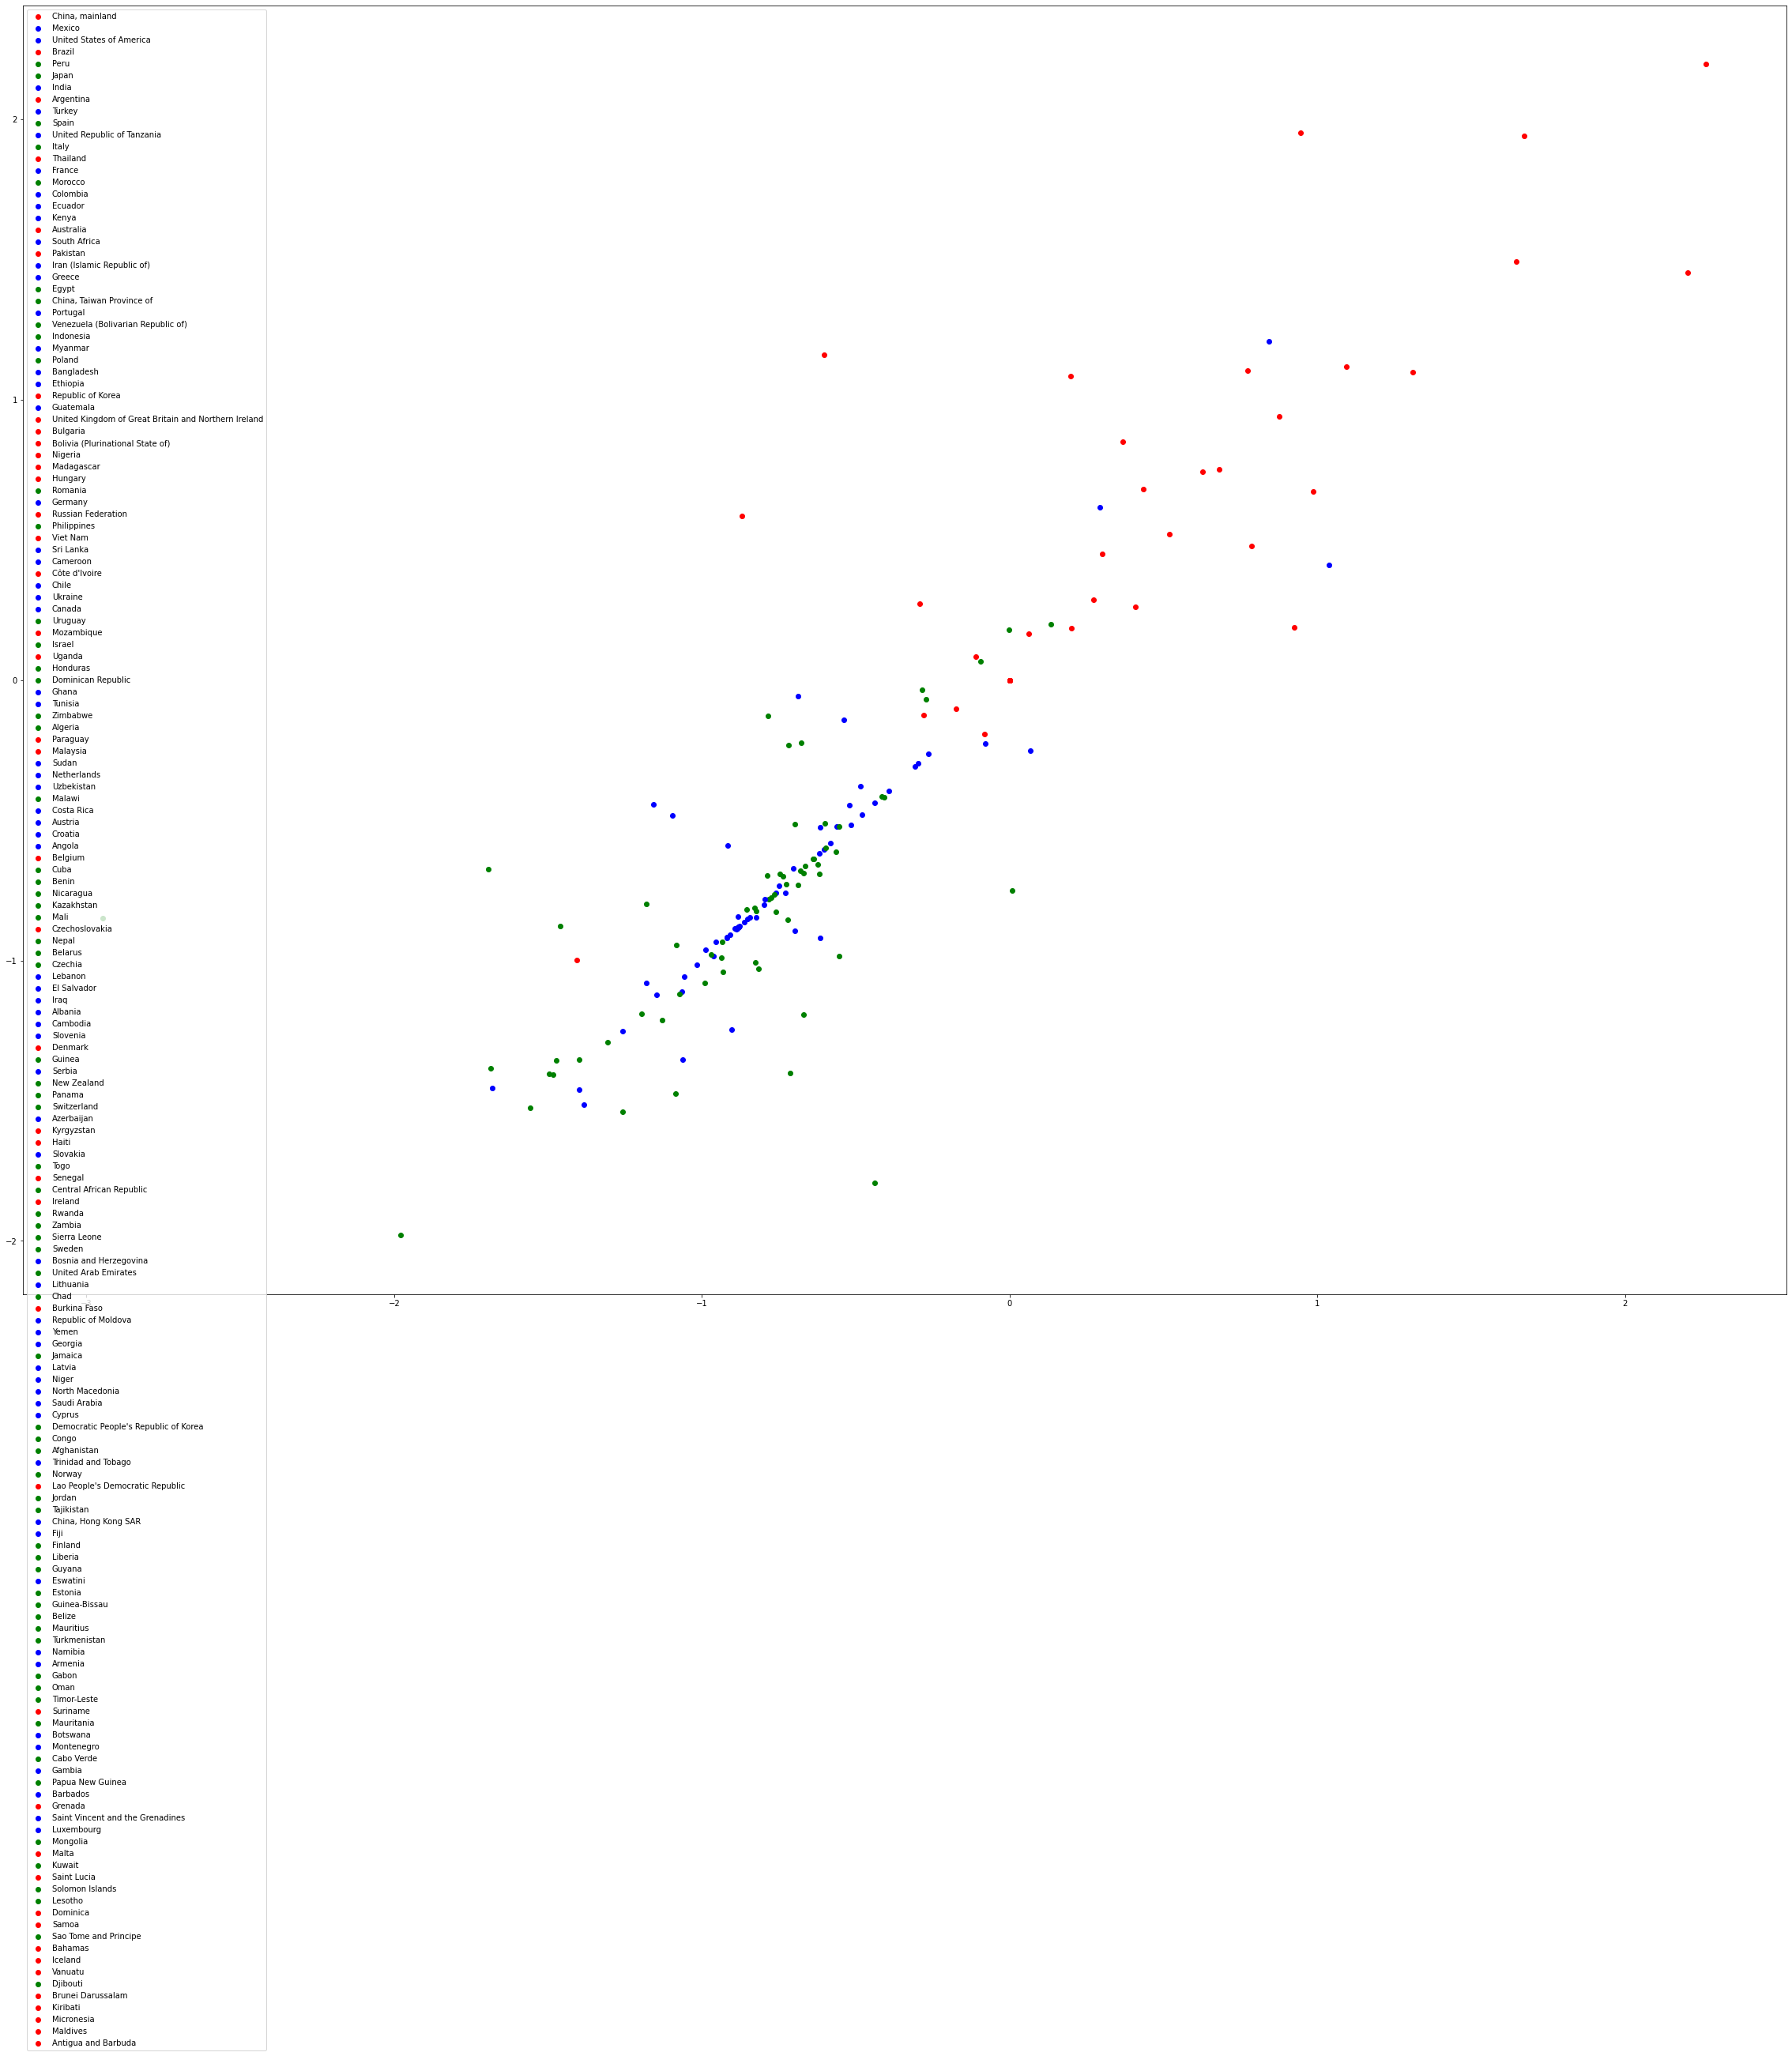

In [25]:
# Plot showing clusters for DTW Barycenter Averaging (DBA K-means)
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

Soft-DTW k-means
361.348 --> 100.910 --> 99.370 --> 99.086 --> 98.663 --> 97.930 --> 98.102 --> 98.067 --> 98.096 --> 98.131 --> 98.161 --> 98.157 --> 98.140 --> 98.149 --> 98.121 --> 98.131 --> 98.114 --> 98.120 --> 98.108 --> 98.121 --> 98.112 --> 98.137 --> 98.096 --> 98.121 --> 98.078 --> 98.079 --> 97.183 --> 97.169 --> 97.119 --> 97.233 --> 97.076 --> 96.994 --> 96.843 --> 96.732 --> 96.684 --> 96.748 --> 96.602 --> 96.612 --> 96.554 --> 96.587 --> 96.557 --> 96.573 --> 96.562 --> 96.569 --> 96.562 --> 96.560 --> 96.558 --> 96.561 --> 96.574 --> 96.572 --> 


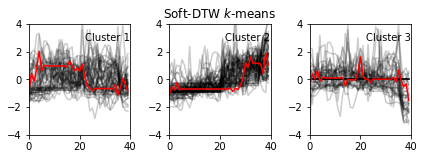

In [26]:
# Soft-DTW-k-means
#  [2] M. Cuturi, M. Blondel “Soft-DTW: a Differentiable Loss Function for Time-Series,” ICML 2017.
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(train)

for yi in range(3):
    plt.subplot(2, 3, 1 + yi)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

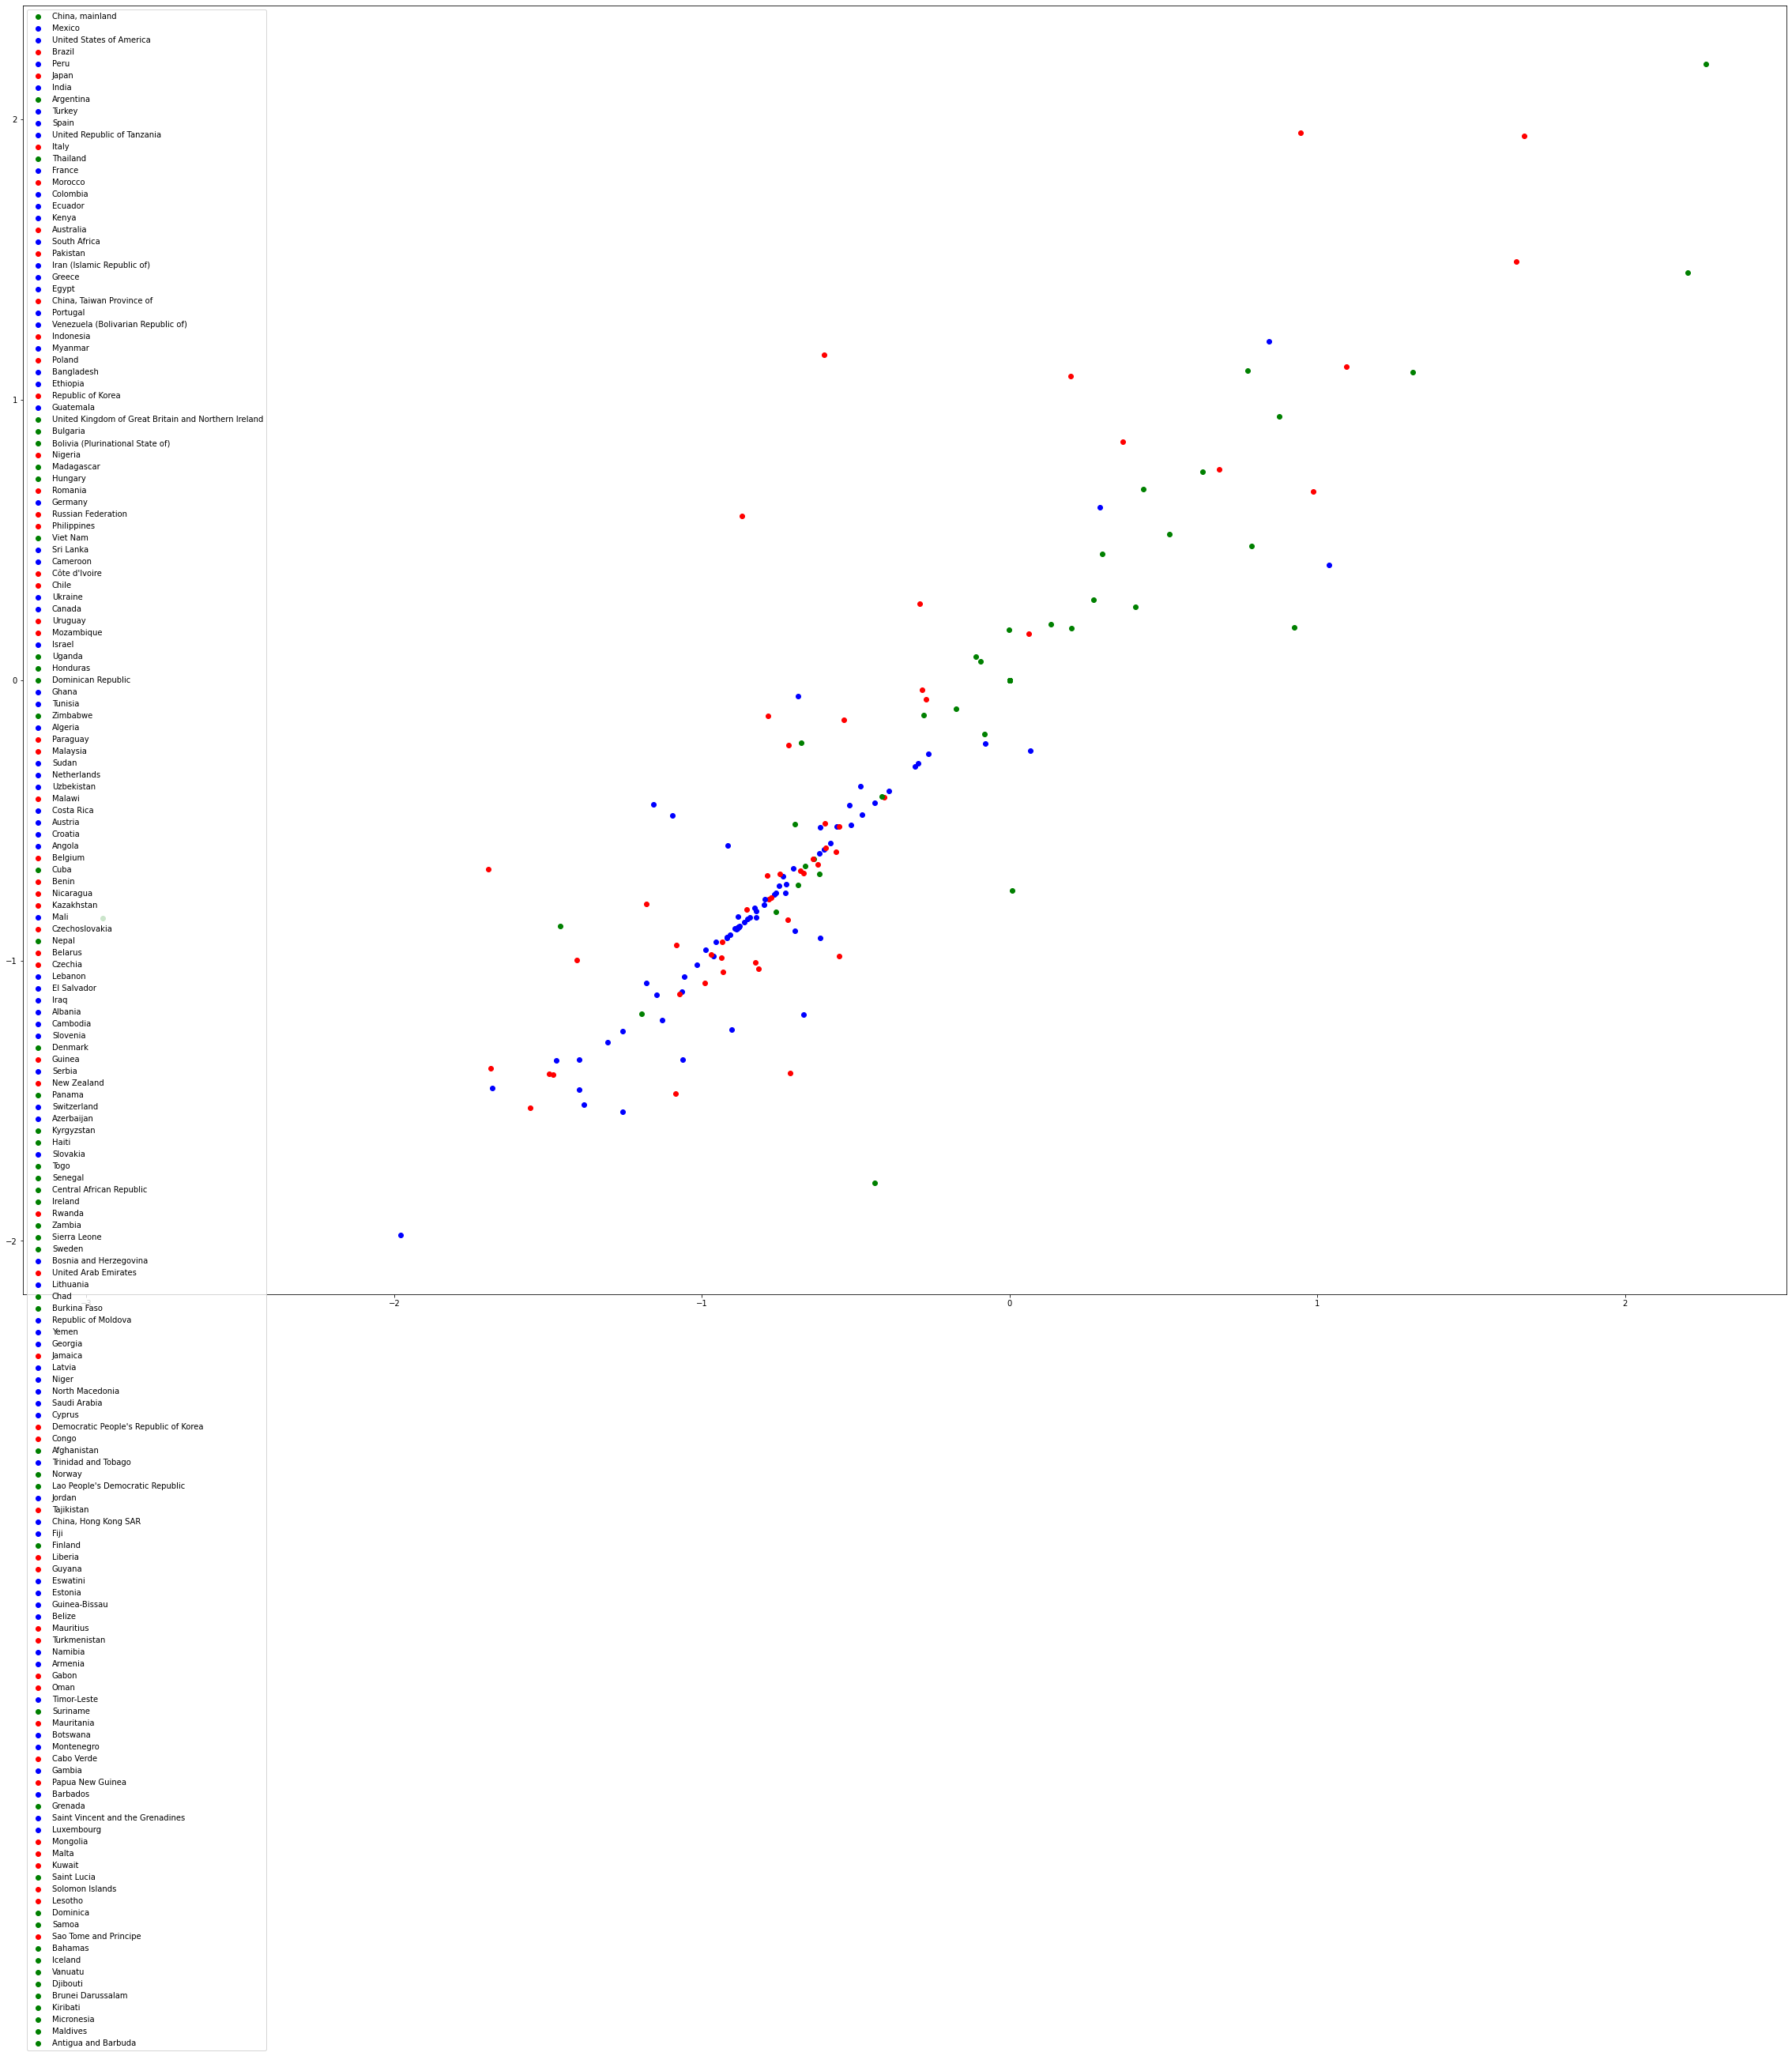

In [27]:
# Plot showing clusters for Soft-DTW K-means
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

In [28]:
labels['NonPerishable_Clusters'] = y_pred.tolist()

In [29]:
labels


,Area,Perishable_Clusters,NonPerishable_Clusters
0,"China, mainland",1,2
1,Mexico,1,1
2,United States of America,2,1
3,Brazil,0,0
4,Peru,1,1
...,...,...,...
167,Brunei Darussalam,1,2
168,Kiribati,2,2
169,Micronesia,2,2
170,Maldives,1,2


In [30]:
totalfoodloss_data = totalfoodloss_data[~totalfoodloss_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [31]:
# find all clusters using the entire dataset
train = totalfoodloss_data

train

,Total_ratio_percent_1961,Total_ratio_percent_1962,Total_ratio_percent_1963,Total_ratio_percent_1964,Total_ratio_percent_1965,Total_ratio_percent_1966,Total_ratio_percent_1967,Total_ratio_percent_1968,Total_ratio_percent_1969,Total_ratio_percent_1970,...,Total_ratio_percent_2009,Total_ratio_percent_2010,Total_ratio_percent_2011,Total_ratio_percent_2012,Total_ratio_percent_2013,Total_ratio_percent_2014,Total_ratio_percent_2015,Total_ratio_percent_2016,Total_ratio_percent_2017,Total_ratio_percent_2018
Area,,,,,,,,,,,,,,,,,,,,,
"China, mainland",5.764780,5.714978,5.613249,5.539799,5.553415,5.610589,5.554720,5.609690,5.586096,5.531545,...,5.529890,5.591324,5.770434,5.210260,5.207735,5.956150,5.879590,6.247610,6.210256,5.817932
Mexico,3.935195,3.769546,5.200433,5.941239,3.815912,3.544134,3.275168,3.757143,3.095224,5.009470,...,6.866240,6.734389,6.218300,6.168915,5.546992,6.221510,6.575465,6.596434,6.645356,6.812159
United States of America,1.540879,1.567914,1.445675,1.393823,1.533496,1.659882,1.474459,1.407704,1.439793,1.428323,...,1.069217,1.072820,0.948329,1.133088,0.998218,4.072180,4.006269,4.017429,4.081259,4.064477
Brazil,9.467606,12.220781,9.555490,9.336295,11.254103,9.624103,13.168096,10.948594,10.991868,10.483012,...,6.709016,7.107931,15.301533,7.435722,7.392450,9.852947,9.826888,9.850074,9.740384,9.756772
Japan,4.729917,4.812794,5.234375,5.201231,5.391671,5.775920,5.739142,6.084294,6.228452,6.518991,...,6.989961,7.216563,7.317713,7.004822,7.021726,6.634577,6.501512,6.630246,6.506666,6.573688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Djibouti,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.756098,9.677419,11.363636,9.677419,9.890110,7.692308,7.608696,8.421053,7.619048,9.000000
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508
Kiribati,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.064516,8.000000,7.978723,7.978723,7.936508


C:\Users\madhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


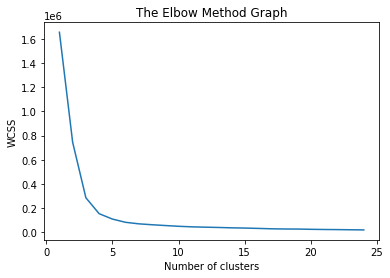

In [32]:
from sklearn.cluster import KMeans
wcss=[]
# find the ideal number of clusters
for i in range(1,25): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train)

    wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
plt.plot(range(1,25),wcss)

# Elbow Graph
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Looks like the ideal number of clusters here is 3

In [33]:
# using 3 clusters for cluster analysis
# Scaler for time series. 
# Scales time series so that their mean (resp. standard deviation) in each dimension is mu (resp. std).
train = TimeSeriesScalerMeanVariance().fit_transform(train)
# Make time series shorter
train = TimeSeriesResampler(sz=40).fit_transform(train)
sz = train.shape[1]

seed = 0
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(train)

Euclidean k-means
24.820 --> 17.045 --> 16.887 --> 16.878 --> 16.878 --> 


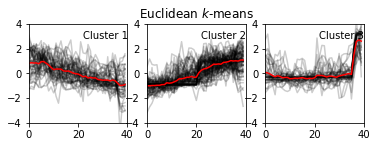

In [34]:
plt.figure()
for yi in range(3):
    plt.subplot(2, 3, yi + 1)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

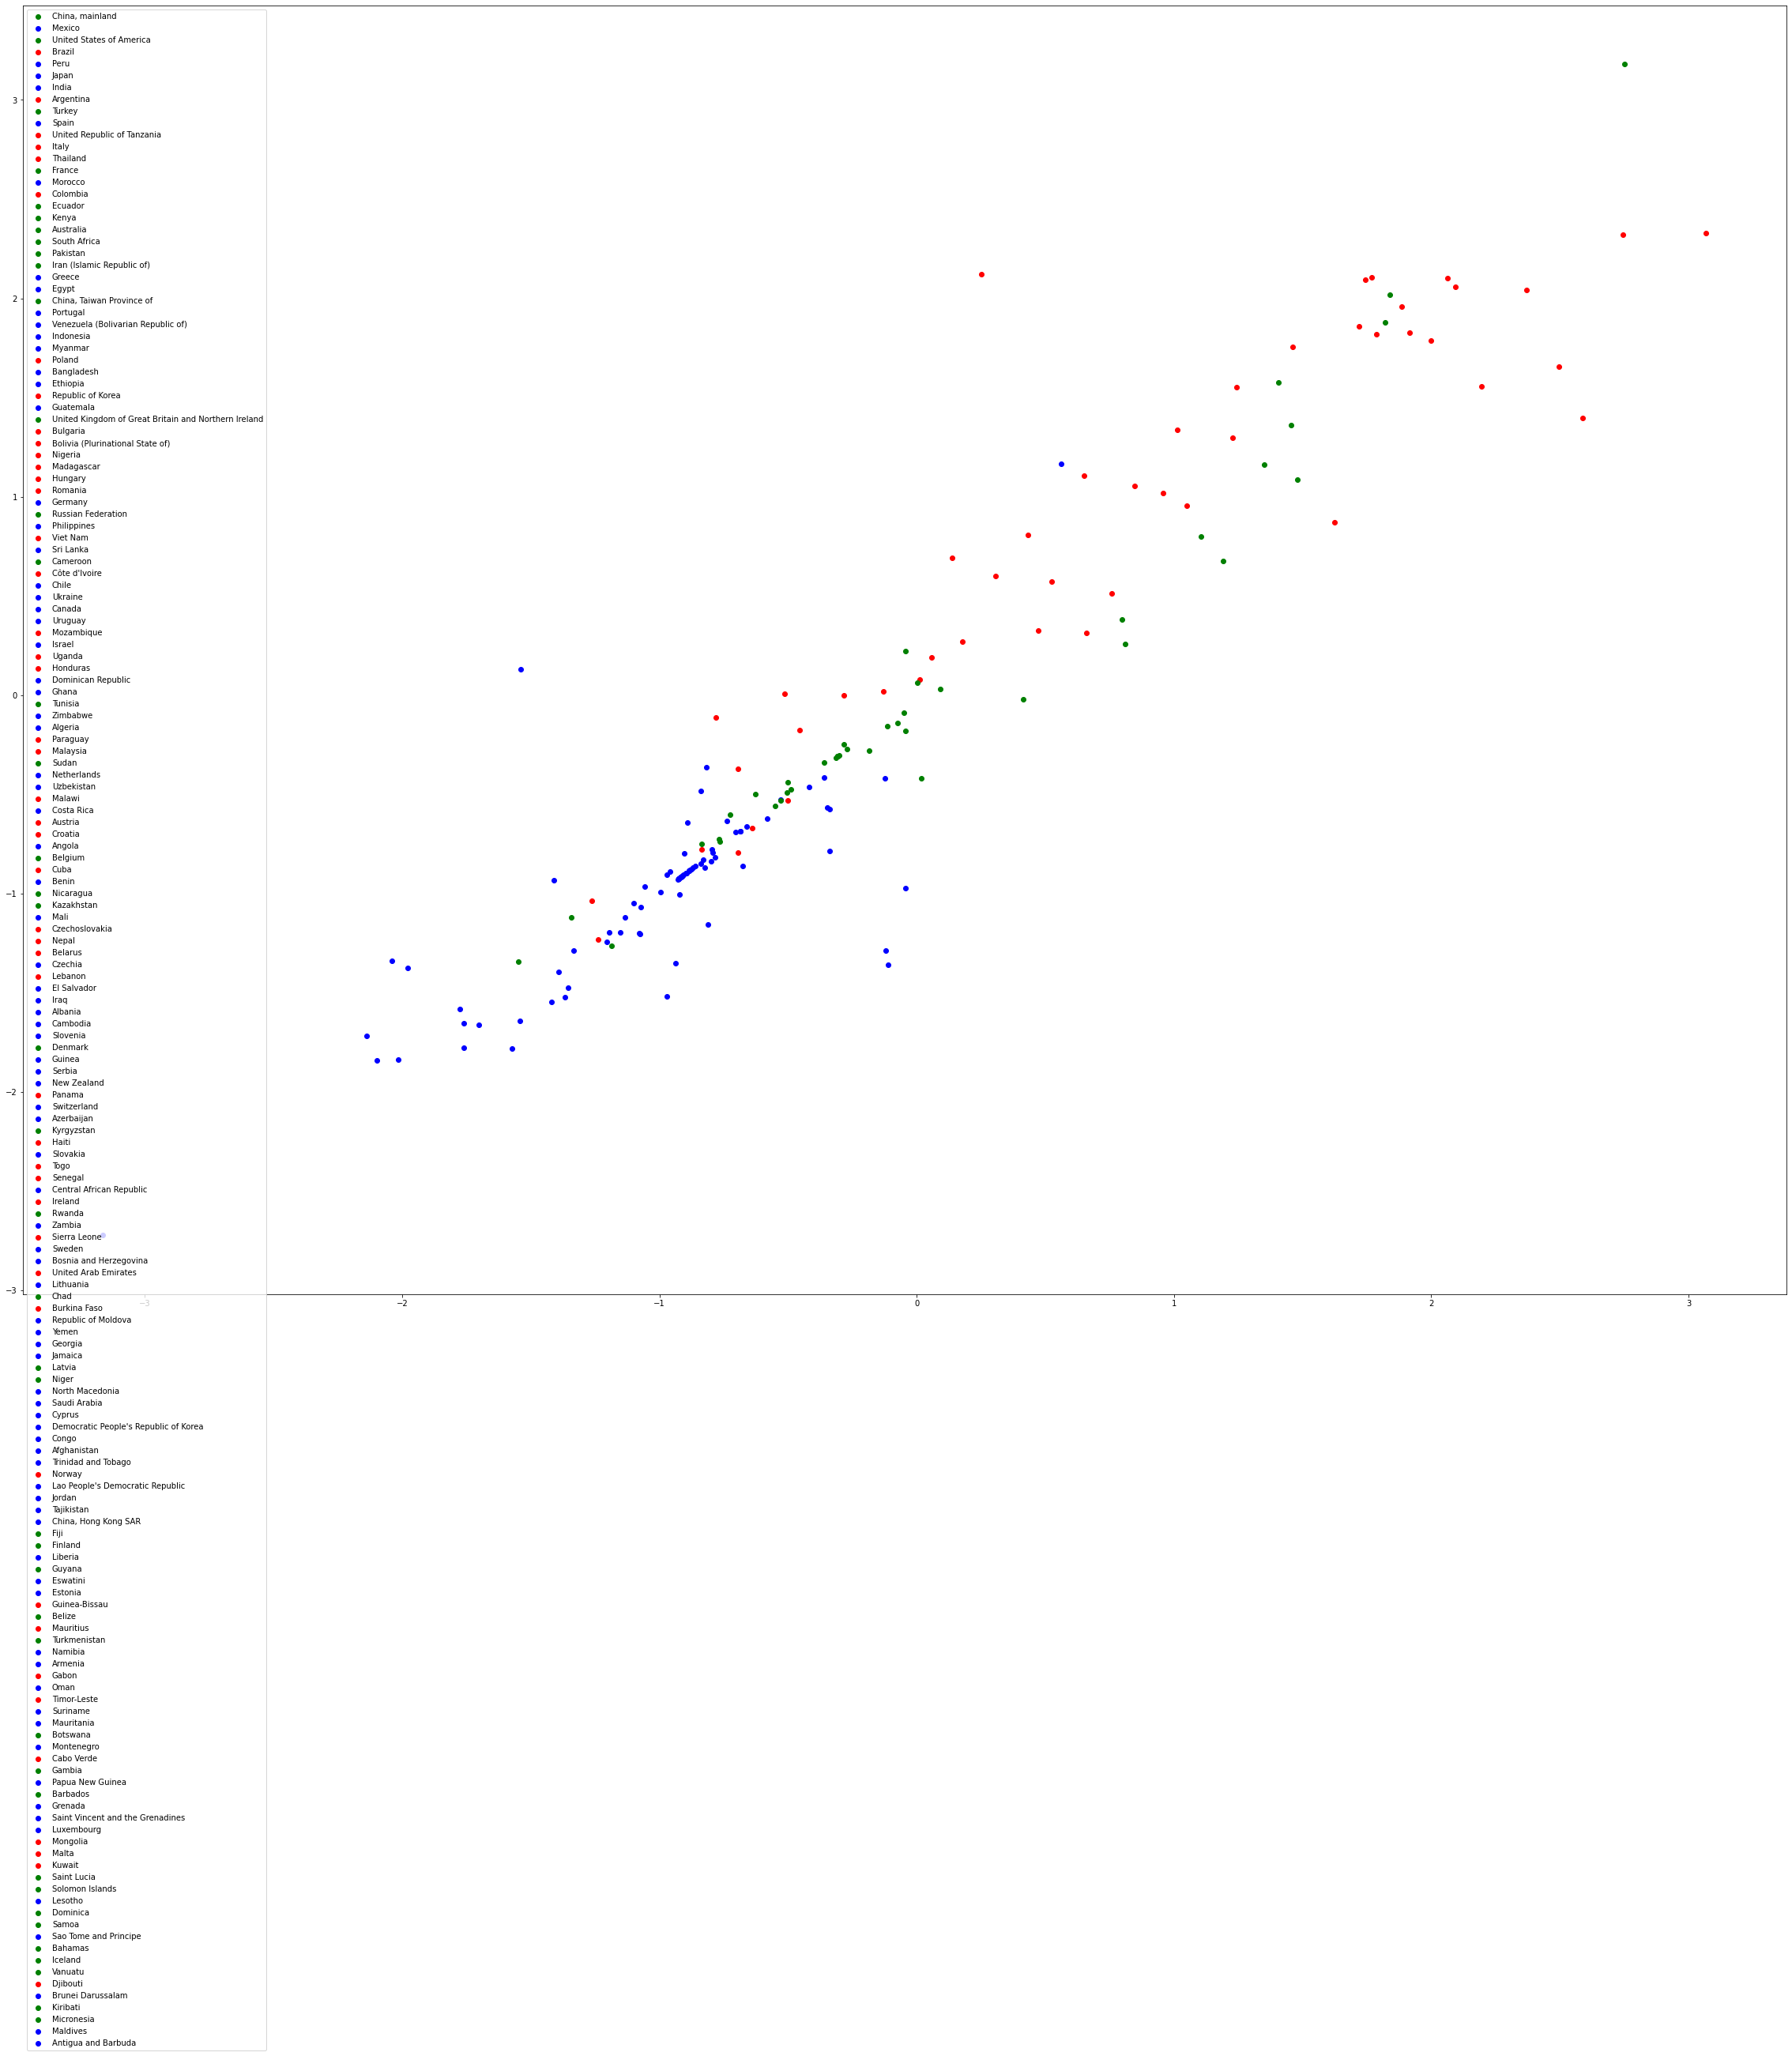

In [35]:
# PLot showing  the clusters for regular K-means
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


13.336 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.618 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.241 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.217 --> 8.217 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


13.189 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.789 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.217 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


8.104 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


8.084 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


8.007 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.745 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.663 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


7.654 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.0s finished


7.652 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


7.652 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 516 out of 516 | elapsed:    0.1s finished


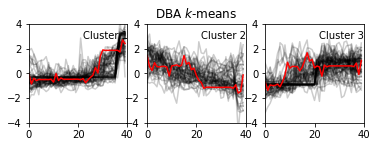

In [36]:
# Performing TimeSeriesKmeans using DBA-k-means (for DTW Barycenter Averaging [1]) 
# [1] F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method for dynamic time warping, with applications to clustering. 
# Pattern Recognition, Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693 
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(train)

for yi in range(3):
    plt.subplot(2, 3, 1 + yi)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

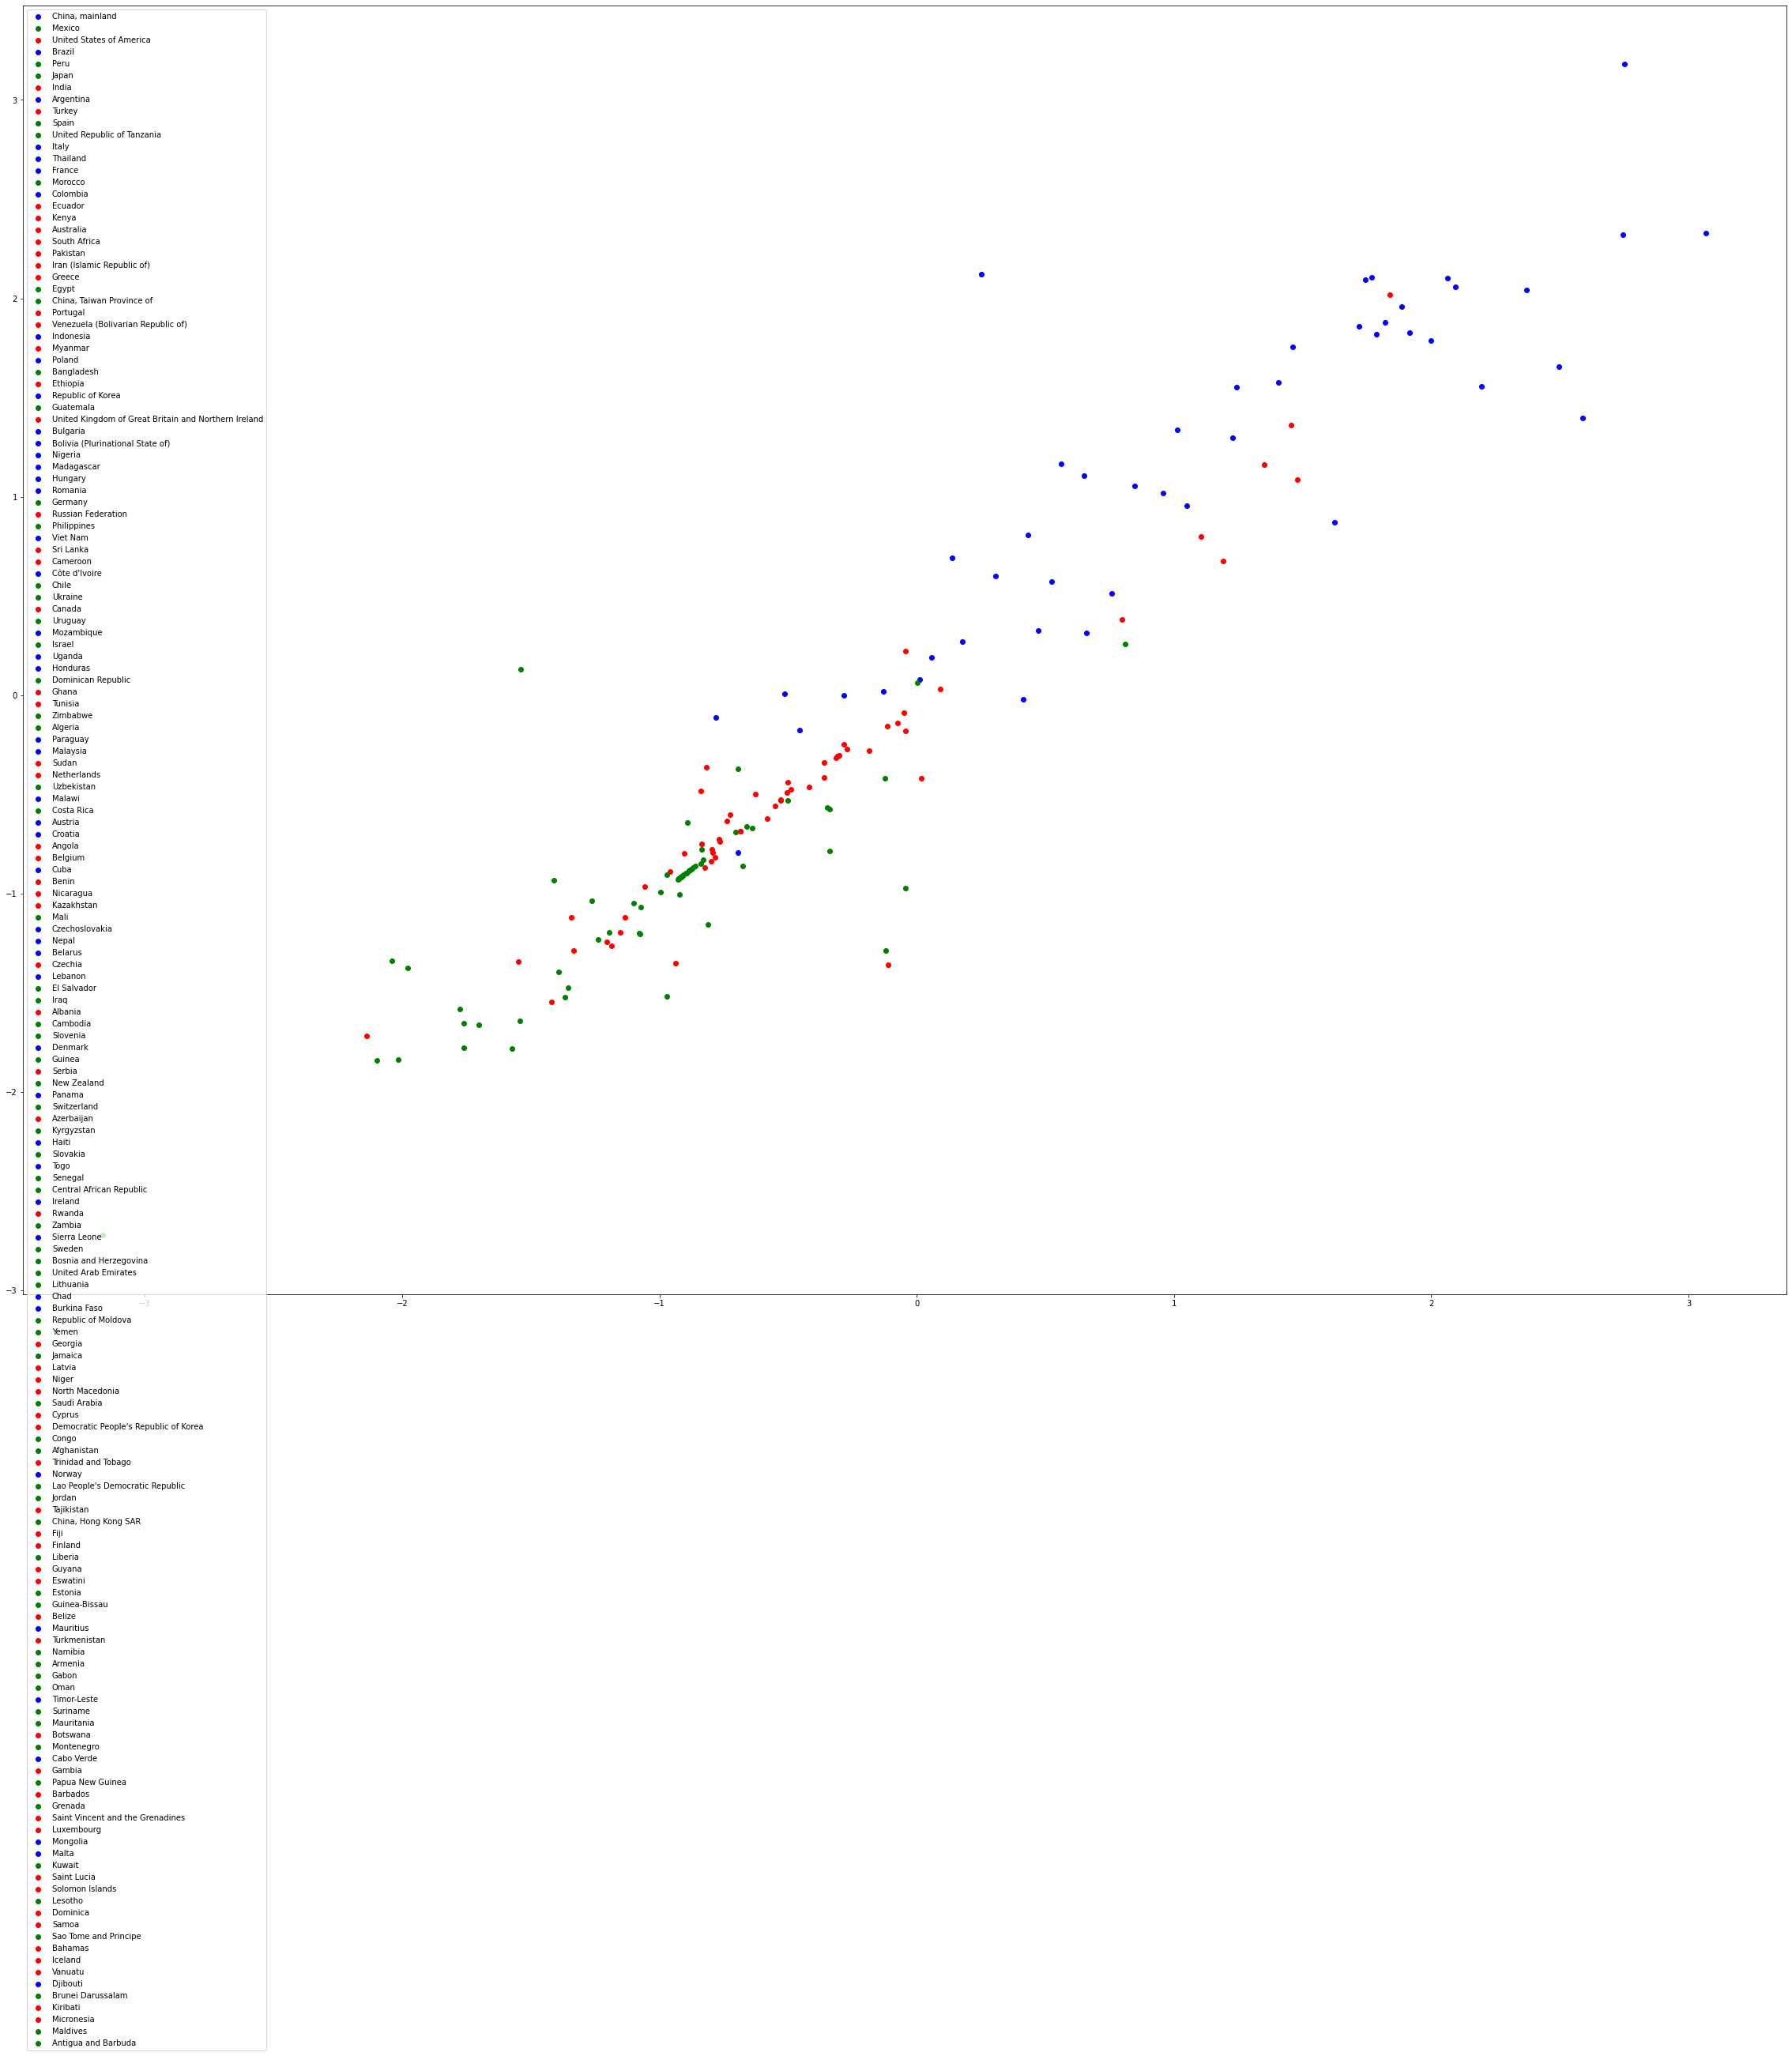

In [37]:
# Plot showing clusters for DTW Barycenter Averaging (DBA K-means)
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

Soft-DTW k-means
220.607 --> 90.133 --> 86.528 --> 82.388 --> 81.144 --> 81.138 --> 80.843 --> 80.847 --> 80.726 --> 80.539 --> 80.512 --> 80.359 --> 80.343 --> 80.338 --> 80.339 --> 80.338 --> 80.127 --> 80.173 --> 80.166 --> 80.119 --> 80.150 --> 80.161 --> 80.151 --> 80.151 --> 80.180 --> 80.150 --> 80.170 --> 80.161 --> 80.175 --> 80.168 --> 80.175 --> 80.171 --> 80.174 --> 80.173 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 80.174 --> 


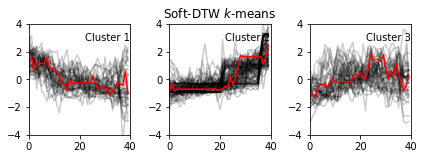

In [38]:
# Soft-DTW-k-means
#  [2] M. Cuturi, M. Blondel “Soft-DTW: a Differentiable Loss Function for Time-Series,” ICML 2017.
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(train)

for yi in range(3):
    plt.subplot(2, 3, 1 + yi)
    for xx in train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

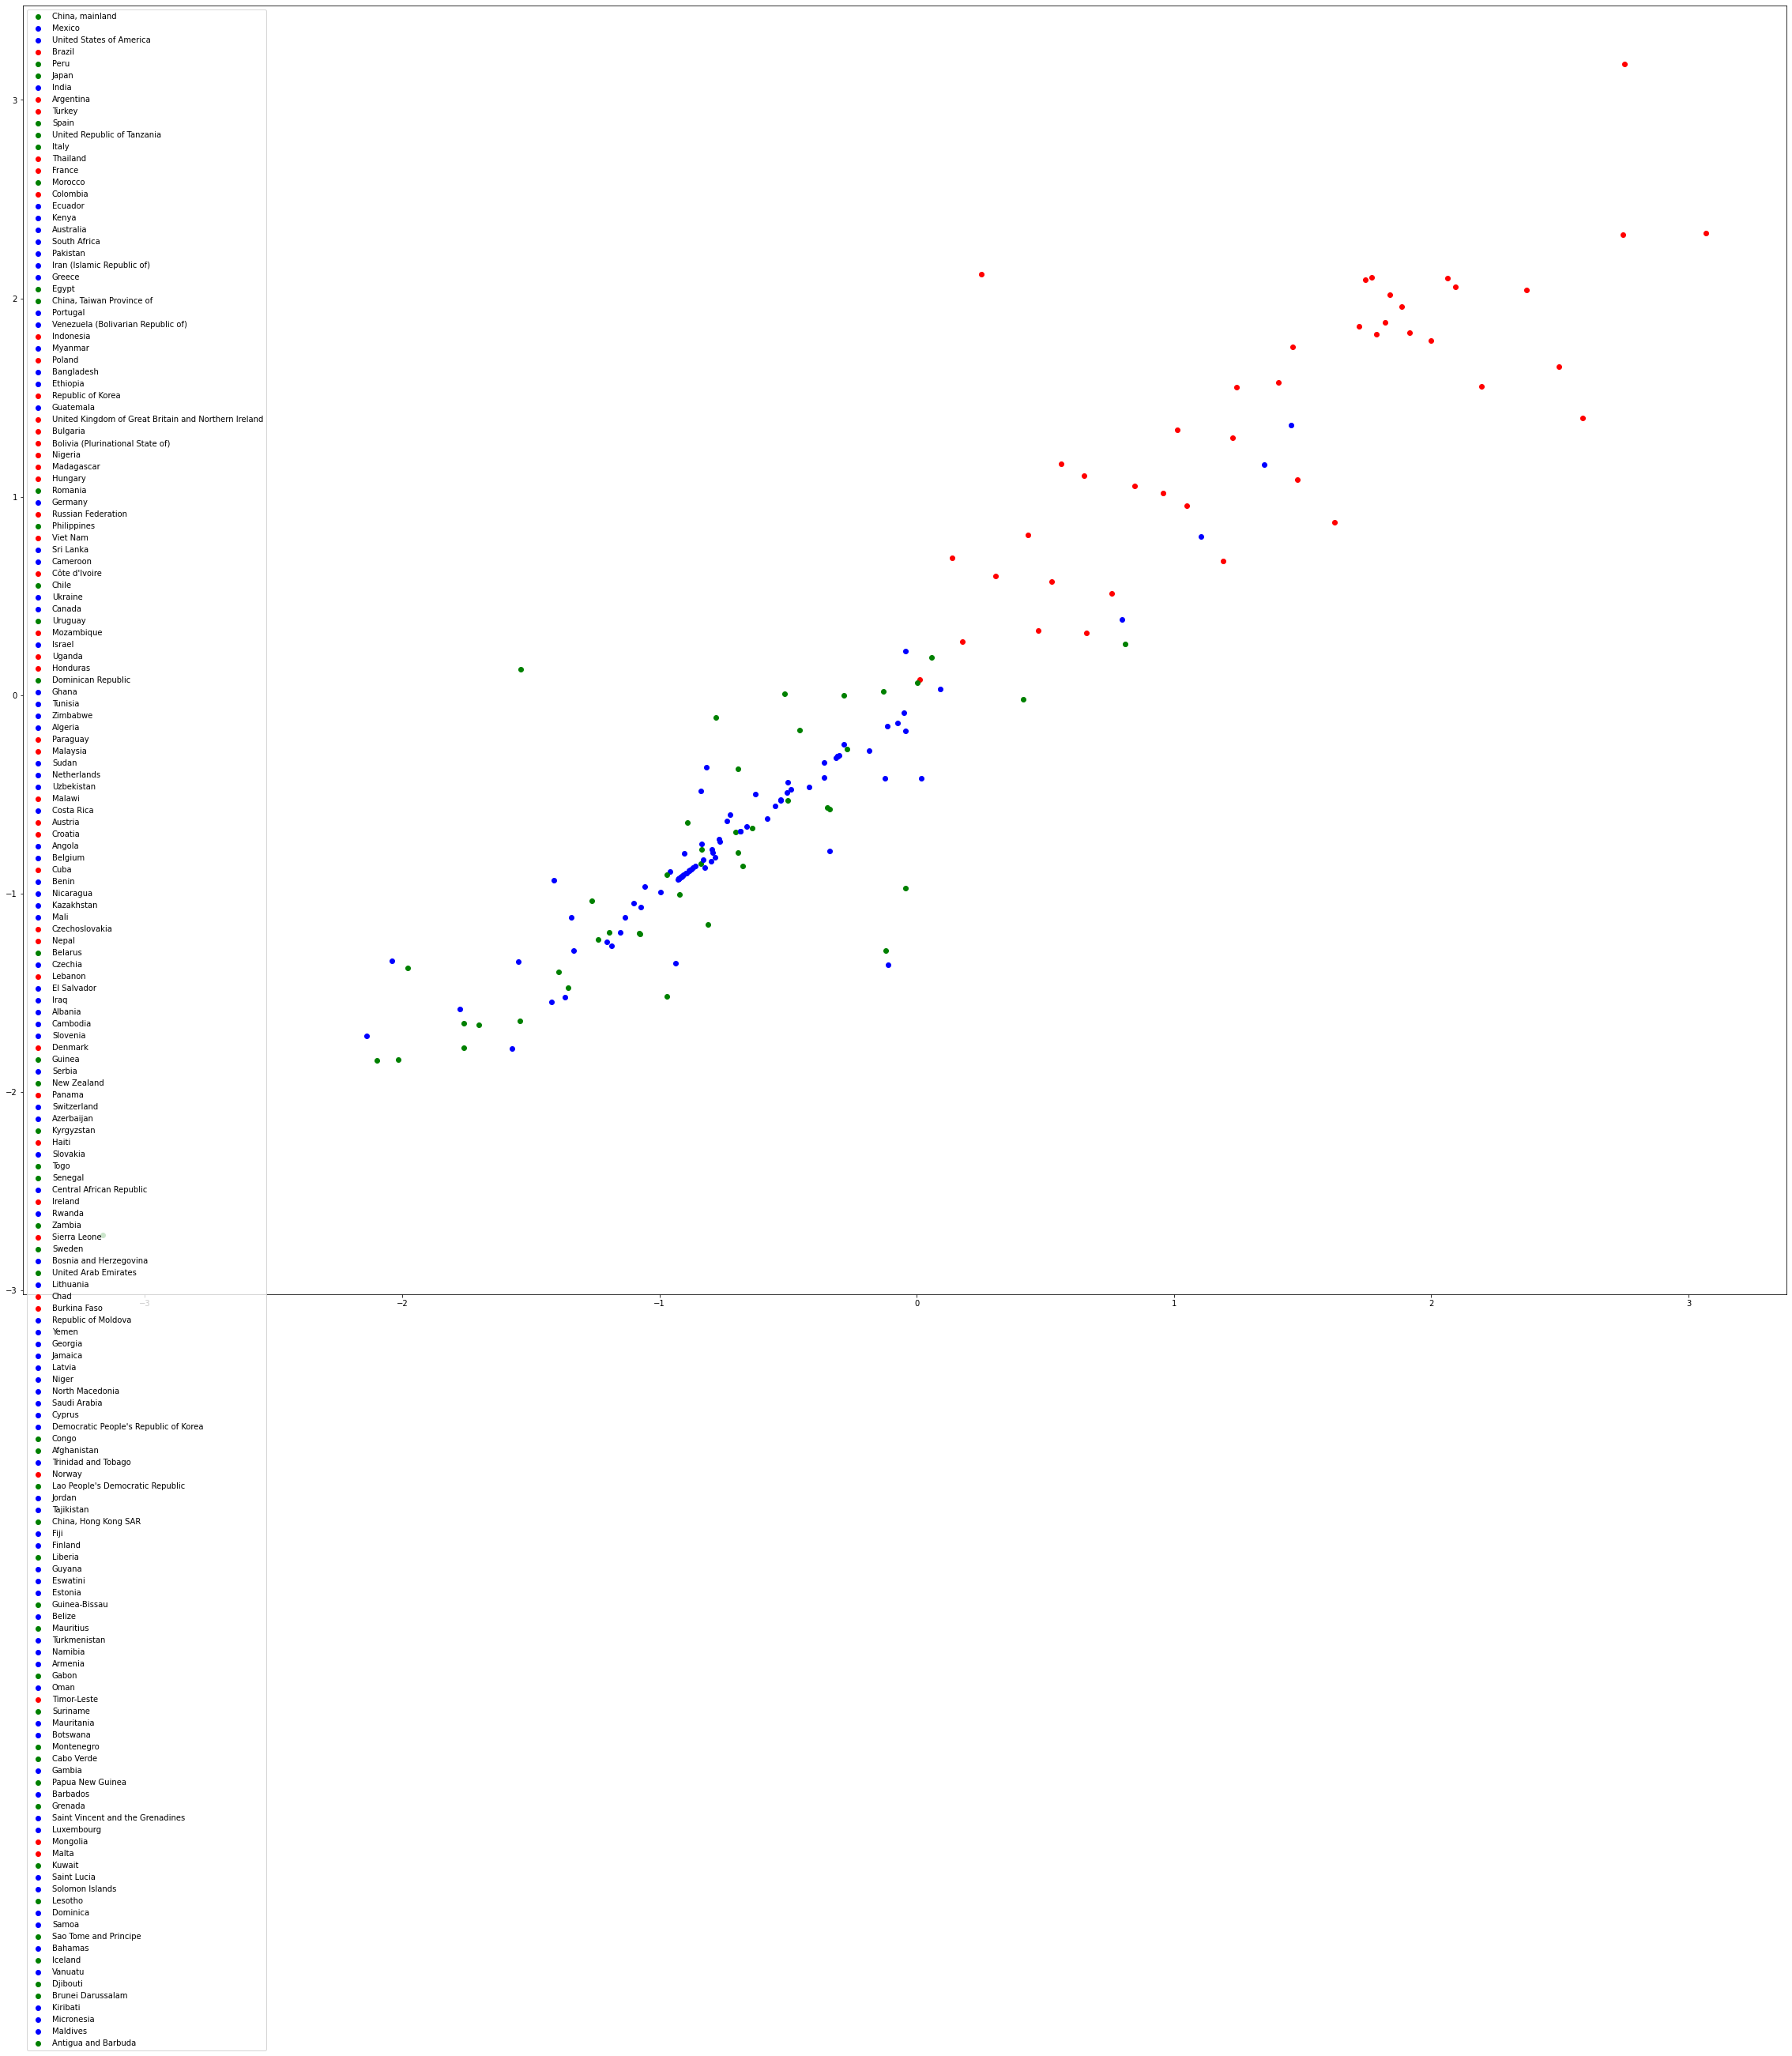

In [39]:
# Plot showing clusters for Soft-DTW K-means
colors = ["red","blue","green"]
label = labels.Area.to_list()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,30))
for i in range(172):
    plt.scatter(train[i,0], train[i,1], color = colors[y_pred[i]], label = label[i])
plt.legend()
plt.show();

In [40]:
labels['Total_Clusters'] = y_pred.tolist()

In [41]:
labels

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
0,"China, mainland",1,2,2
1,Mexico,1,1,1
2,United States of America,2,1,1
3,Brazil,0,0,0
4,Peru,1,1,2
...,...,...,...,...
167,Brunei Darussalam,1,2,2
168,Kiribati,2,2,1
169,Micronesia,2,2,1
170,Maldives,1,2,1


In [42]:
#Area with highest losses 2014 to 2018
countries = ["China, mainland","Brazil", "India", "United States of America", "Indonesia", "Nigeria", "Turkey", "Mexico", "Ghana", "Pakistan"]
df = labels
highest_loss_2014_2018 = df[df['Area'].isin(countries)]
highest_loss_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
0,"China, mainland",1,2,2
1,Mexico,1,1,1
2,United States of America,2,1,1
3,Brazil,0,0,0
6,India,1,1,1
8,Turkey,2,1,0
20,Pakistan,2,0,1
27,Indonesia,0,0,0
37,Nigeria,0,0,0
57,Ghana,2,1,1


In [43]:
#Area with lowest losses 2014 to 2018
countries = ['Maldives', 'Antigua and Barbuda', 'Iceland', 'Djibouti', "Grenada", 'Saint Vincent and the Grenadines', "Bahamas", "Barbados", "Luxembourg", "Saint Lucia"]
lowest_loss_2014_2018 = df[df['Area'].isin(countries)]
lowest_loss_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
150,Barbados,2,1,1
151,Grenada,1,2,2
152,Saint Vincent and the Grenadines,1,1,1
153,Luxembourg,1,1,1
157,Saint Lucia,2,2,1
163,Bahamas,2,2,1
164,Iceland,2,2,2
166,Djibouti,0,2,2
170,Maldives,1,2,1
171,Antigua and Barbuda,1,2,2


In [44]:
#Area with highest production 2014 to 2018
countries = ["China, mainland","Brazil", "India", "United States of America", "Indonesia", "Russian Federation", "Nigeria", "Thailand", "Argentina", "France"]
highest_production_2014_2018 = df[df['Area'].isin(countries)]
highest_production_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
0,"China, mainland",1,2,2
2,United States of America,2,1,1
3,Brazil,0,0,0
6,India,1,1,1
7,Argentina,0,2,0
12,Thailand,0,2,0
13,France,2,1,0
27,Indonesia,0,0,0
37,Nigeria,0,0,0
42,Russian Federation,2,0,0


In [45]:
#Area with lowest production 2014 to 2018
countries = ['Maldives', 'Antigua and Barbuda', 'Iceland', 'Djibouti', "Grenada", 'Saint Vincent and the Grenadines', "China, Hong Kong SAR", "Sao Tome and Principe", "Dominica", "Saint Lucia"]
lowest_production_2014_2018 = df[df['Area'].isin(countries)]
lowest_production_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
127,"China, Hong Kong SAR",0,1,2
151,Grenada,1,2,2
152,Saint Vincent and the Grenadines,1,1,1
157,Saint Lucia,2,2,1
160,Dominica,1,2,1
162,Sao Tome and Principe,1,0,2
164,Iceland,2,2,2
166,Djibouti,0,2,2
170,Maldives,1,2,1
171,Antigua and Barbuda,1,2,2


In [46]:
#Area with highest loss/production ratio 2014 to 2018
countries = ['China, Hong Kong SAR', 'United Arab Emirates', 'Saint Lucia', 'Ghana', 'Dominica', "Kuwait", 'Gabon', "Namibia", 'Cameroon', 'Algeria']
highest_loss_to_prod_2014_2018 = df[df['Area'].isin(countries)]
highest_loss_to_prod_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
46,Cameroon,2,1,1
57,Ghana,2,1,1
60,Algeria,1,1,1
106,United Arab Emirates,1,0,2
127,"China, Hong Kong SAR",0,1,2
138,Namibia,1,1,1
140,Gabon,0,0,2
156,Kuwait,1,0,2
157,Saint Lucia,2,2,1
160,Dominica,1,2,1


In [47]:
#Area with lowest loss/production ratio 2014 to 2018
countries = ['Malaysia', "Latvia", "Romania", 'Hungary', 'Russian Federation', 'Estonia', "Argentina", 'Ireland', "Panama", 'New Zealand']
lowest_loss_to_prod_2014_2018 = df[df['Area'].isin(countries)]
lowest_loss_to_prod_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
7,Argentina,0,2,0
39,Hungary,0,2,0
40,Romania,0,0,2
42,Russian Federation,2,0,0
62,Malaysia,0,0,0
90,New Zealand,1,0,2
91,Panama,0,2,0
100,Ireland,0,2,0
114,Latvia,2,1,1
133,Estonia,1,1,1


In [48]:
#Area with highest loss/production ratio (Perishable) 2014 to 2018
countries = ['China, Hong Kong SAR', 'United Arab Emirates', 'Saint Lucia', 'Ghana', 'Dominica', "Iraq", 'Gabon', "Namibia", 'Cameron', 'Mauritania']
highest_loss_to_prod_perishable_2014_2018 = df[df['Area'].isin(countries)]
highest_loss_to_prod_perishable_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
57,Ghana,2,1,1
83,Iraq,1,1,1
106,United Arab Emirates,1,0,2
127,"China, Hong Kong SAR",0,1,2
138,Namibia,1,1,1
140,Gabon,0,0,2
144,Mauritania,2,0,1
157,Saint Lucia,2,2,1
160,Dominica,1,2,1


In [49]:
#Area with lowest loss/production ratio (Perishable) 2014 to 2018
countries = ['Malaysia', 'Ireland', "Belarus", "Latvia", "El Salvador", 'Hungary', 'Russian Federation', "Argentina",  "Panama", 'New Zealand']
lowest_loss_to_prod_perishable_2014_2018 = df[df['Area'].isin(countries)]
lowest_loss_to_prod_perishable_2014_2018

,Area,Perishable_Clusters,NonPerishable_Clusters,Total_Clusters
7,Argentina,0,2,0
39,Hungary,0,2,0
42,Russian Federation,2,0,0
62,Malaysia,0,0,0
79,Belarus,0,0,2
82,El Salvador,1,1,1
90,New Zealand,1,0,2
91,Panama,0,2,0
100,Ireland,0,2,0
114,Latvia,2,1,1


In [50]:
highest_loss_to_prod_2014_2018.to_csv('out.csv',index=False)
lowest_loss_to_prod_2014_2018.to_csv('out1.csv', index = False)